--- 
Microeconometrics | Summer 2021 | M.Sc. Economics, Bonn University 

# Replication of Angrist, J., and Evans, W. (1998). "Children and Their Parent's Labor Supply: Evidence from Exogenous Variation in Family Size". <a class="tocSkip">   

[Carolina Alvarez Garavito](https://github.com/carolinalvarez)
---

**Angrist, J.D., & Evans, W.N. (1998).** [Children and Their Parents' Labor Supply: Evidence from Exogenous Variation in Family Size](https://www.jstor.org/stable/116844?seq=1). *The American Economic Review*, 88(3). 450-477. 

# Table of contents
* [Introduction](#Introduction)
* [Identification Strategy](#Identification)
* [Empirical Methodology](#Empirical-Methodology)
* [Replication Angrist & Evans (1998)](#Replication-of-Angrist-&-Evans-(1998))
 * [Data & Descriptive Statistics](#Data-&-Descriptive-Statistics)

In [1]:
%matplotlib inline
!pip install linearmodels
!pip install stargazer
import numpy as np
import pandas as pd
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
from linearmodels.iv import IV2SLS
import matplotlib as plt
import matplotlib.pyplot as plt
import copy
from IPython.display import HTML
from stargazer.stargazer import Stargazer
from statsmodels.api import add_constant
from functools import reduce

---
# Introduction 
---

---
# Identification
--- 
![causal graph1](files/causal_graph_v1.png)


Angrist and Evans (1998) study the causal mechanisms between fertility and the work effort of both men and women. The authors begin by explaining the theoretical and practical reasons of studying the relationship between fertility and labor supply. First, there has been development of economic models that link the family and the labor market. Second, the relationship between fertility and labor supply could explain the increase of women's participation in the labor market in the post-war period, where having fewer children could have increased the female labor-force share. Meanwhile, other studies have linked fertility with female withdraws from the labor market and lower wages compared to men.

The mayority of empirical studies related to childbearing and labor supply find a negative correlation between family size (i.e., fertility) and female labor force. However, in his assesment of Economics of the Family, Robert J. Willis argues that there has not been well-measured exogenous variables that allow to separate cause and effect relationships from correlations among variables such as delay of marriage, decline of childbearing, increase in divorces, and increase in female labor force participation.

In this vein, the authors argue that the problems concerning the causal association between family size and labor supply arises from the theoretical argument that both factors are jointly determinated. For example, some labor-supply econometric models often use child-status variables as regressors on hours of work. On the other hand, economic demographers usually measure the effect of wages on fertility. According to the authors, "*since fertility variables cannot be both dependent and exogenous at the same time, it seems unlikely that either sort of regression has a causal interpretation*". 

Angrist and Evans (1998) contribute by using an **instrumental variable strategy (IV)** based on the sex-mix of children in families with two or more kids. This captures parental preferences for mixed-sex siblings, where parents of same-sex children are much more likely to have an additional child.

**Endogeneity Problem**

<center>Fertility 🠊 Labor supply</center>
<center>Labor supply 🠊 Fertility </center>

**Instrument** 

<center>Dummy variable for whether the sex of the second child matches the sex of the first child</center> 

---
# Empirical Methodology
## Casual estimation with a Binary IV

\begin{equation}
Y = \alpha + \delta D + \epsilon
\end{equation}

\begin{equation}
E[Y] = E[\alpha + \delta D + \epsilon]= \alpha + \delta E[D] + E[\epsilon]
\end{equation}

We re-write it as a difference equation in Z and divide both sides by $ E[D|Z=1] - E[D|Z=0]$ which yields:

\begin{equation}
\frac{E[Y|Z=1]-E[Y|Z=0]}{E[D|Z=1]-E[D|Z=0]} =\frac{\delta (E[D|Z=1]-E[D|Z=0]) + (E[\epsilon|Z=1]-E[\epsilon|Z=0])}{E[D|Z=1]-E[D|Z=0]}
\end{equation}

If the data holds for the causal graph despicted above, then $Z$ has no association with $ /epsilon$ and therefore:

\begin{equation}
\frac{E[Y|Z=1]-E[Y|Z=0]}{E[D|Z=1]-E[D|Z=0]} =\delta
\end{equation}

Under these conditions, the ratio of the population-level association between Y and Z and between D and Z is equal to the causal effect of D on Y. Then, if $Z$ is associated with $D$ but not with $/upvarepsilon$, then the following is the IV-Estimator for infinite samples:

\begin{equation}
\hat{\delta}_{IV,WALD} = \frac{E_N[y_i|z_i=1] - E_N[y_i|z_i=0]}{E_N[d_i|z_i=1] - E_N[d_i|z_i=0]}
\end{equation}

This is the IV-Estimator, which is known as the Wald Estimator when the instrument is binary. The wald estimator takes the average difference in the observed outcome of those who were exposed to the instrumental variable and of those who were not. Then it takes the average difference between the ones in the treatment group who took the treatment and those in the tratment group who did not receive the treatment.

## IV Estimation as LATE Estimation

Imbends and Angrist (1994) developed a framework for classifiying individuals as: i) those who respond positively to an instrument; ii) those who remain unaffected by the instrument; iii) those who rebel against the instrument. When $D$ and $Z$ are binary variables, then they are four possible group of individuals:

| Status                                    |Potential treatment assignment         | 
| ------------------------------------------|:-------------------------------------:| 
| Compliers ($\tilde{C}=c$)                 | $D^{Z=0}=0; D^{Z=1}=1$                | 
| Defiers ($\tilde{C}=d$)                   | $D^{Z=0}=1 D^{Z=1}=0$                 | 
| Always takers ($\tilde{C}=a$)             | $D^{Z=0}=1 D^{Z=1}=1$                 |  
| Never takers ($\tilde{C}=n$)              | $D^{Z=0}=0 D^{Z=1}=0$                 |   


A valid instrument $Z$ for the casual effect of $D$ on $Y$ must satisfy three assumptions in order to identify the **LATE**:

* Independence assumption: ($Y^{1}, Y^{0}, D^{Z=1}, D^{Z=0} \indep Z$)

This is analogous to the assumption that $cov(Z, \varepsilon)=0$ in the traditinal IV litera
* Non-zero effect of instrument assumption: $k \neq 0$ for all $i$
* Monotonicity assumption: either $k \geq 0$ for all $i$ or $k \leq 0$ for all $i$ 


---

---
# Replication of Angrist & Evans (1998)
---

## A. Data & Descriptive Statistics

Angrist and Evans (1998) use two extracts from the Census Public Use Micro Samples(PUMS) that correspond to the year 1980 and 1990 respectively. The Census contains information on labor supply, the sex of mother's first two children, and an indicator of multiple births.

However, there is no retrospective fertility information in the PUMS data sets other than the total number of children ever born. That means, the census does not track children across households. The authors thus matched children to mothers within households accordingly to the following strategy: they attached people in a household labeled as *child* to a female householder or the spouse of a male householder. They deleted any mother for whom the number of children in the household did not match the total amount of children ever born. Also, in households with multiple families, relationship codes and subfamily identifiers were used to pair children with mothers.

The sample is then limited to mothers aged 21-35 whose oldest child was less than 18 years old at the time of the Census. There are two main reasons to restrict the data in such fashion. First, few women younger than age 21 have two children, thus taking into account younger women will decrease the number of observations for the instrumental variable *more than two children* . Second, a child over 18 is very likely to have moved to a different household. It is very unlikely that a woman aged 35 years old at the time of the census has a child 18 year old or more. Thus, restricting the sample to women aged 35 or less assures that the two children are still living in the household and therefore, still be financially dependent from their parents.

For the empirical analysis, the authors use two samples for each year of census. The first includes all women (after restricting the sample to mothers aged 21-35) with two or more children. The second sample includes only married women for testing the main theories of household production (e.g., Gronau, 1973) and exploring the impact of children as well on father's labor supply.

The following table summarizes the samples created by the authors and used for the empirical analysis:


| Year        | Sample        | Description                                                            |
| :----       | :----         |:----                                                                   |
| 1980        | Full sample   | Woman with two or more children, age 21-35 years old                   |
|             | Married sample| Couples married at time of census, only once and at time of first birth|                   
| 1990        | Full sample   | Woman with two or more children, age 21-35 years old                   |            
|             |Married sample | Woman married at time of census                                        |                                

Variables with information on timing of first marriage and the number of marriages is not available in the 1990 PUMS; thereore, for building the 1990 married sample, only the variable wheter the woman was married at the time of the census is considered.

In [192]:
census_1_1980 = pd.read_stata("data/m_d_806_1.dta")
census_2_1980 = pd.read_stata("data/m_d_806_2.dta")
data_1980=census_1_1980.append(census_2_1980, ignore_index=False, verify_integrity=False, sort=False)
#data = prepare_data(data) from the auxiliary to be created after def variables

In [206]:
census_1_1990 = pd.read_stata("data/m_d_903_1.dta")
census_2_1990 = pd.read_stata("data/m_d_903_2.dta")
census_3_1990 = pd.read_stata("data/m_d_903_3.dta")
data_1990=census_1_1990.append([census_2_1990, census_3_1990], ignore_index=False, verify_integrity=False, sort=False)
#data = prepare_data(data) from the auxiliary to be created after def variables

---
<span style="color:coral">**NOTE**:</span> The original data provided by the authors can be found [here](https://economics.mit.edu/faculty/angrist/data1/data/angev98). For this replication the data is split into two .dta-files due to size constraints.

---

In [7]:
data_1980.describe()

,const,STATE,SEXK,AGEK,QTRBKID,RACEK,SPANISH,BIRTHPLK,SCHOOLK,GRADE,...,workedm,workedd,more1k,more2k,more3k,yobd,ageqm,ageqd,agefstm,agefstd
count,927267.0,927267.000000,927267.000000,927267.000000,927267.000000,927267.000000,927267.000000,927267.000000,927267.000000,927267.000000,...,927267.000000,927267.000000,927267.000000,927267.000000,927267.000000,762843.000000,927267.00000,762843.000000,927267.000000,762843.000000
mean,1.0,28.463958,0.488175,8.758242,2.522137,1.575727,0.148400,48.795570,0.956873,5.507927,...,0.609795,0.799311,0.706559,0.270864,0.270864,44.885628,125.32954,138.938391,22.198787,25.625683
std,0.0,15.381372,0.499860,4.764916,1.113425,2.055951,0.610885,112.210375,0.685231,4.391520,...,0.487796,0.400516,0.455339,0.444406,0.444406,7.147892,24.59747,28.585612,4.363212,5.578779
min,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-11.000000,78.00000,60.000000,2.500000,-2.750000
25%,1.0,17.000000,0.000000,5.000000,2.000000,1.000000,0.000000,17.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,41.000000,107.00000,119.000000,19.000000,22.000000
50%,1.0,29.000000,0.000000,9.000000,3.000000,1.000000,0.000000,30.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,46.000000,124.00000,136.000000,21.500000,24.750000
75%,1.0,41.000000,1.000000,13.000000,4.000000,1.000000,0.000000,42.000000,1.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,141.00000,155.000000,24.500000,28.250000
max,1.0,56.000000,1.000000,17.000000,4.000000,13.000000,4.000000,997.000000,3.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,241.00000,362.000000,57.250000,83.500000


In [154]:
data_1990.describe()

,const,SEX2NDK,MULTI2ND,AGE2NDK,ASEX2ND,AAGE2ND,SEXK,RACEK,AGEK,PWGTK1,...,faminc_log,nonmomi,nonmomi_log,workedm,workedd,more1k,more2k,more3k,agefstm,agefstd
count,974693.0,666384.000000,666384.000000,666384.000000,666384.000000,666384.000000,974693.000000,974693.000000,974693.000000,974693.000000,...,974693.000000,974693.000000,974693.000000,974693.000000,974693.000000,974693.000000,974693.000000,974693.000000,974693.000000,762811.000000
mean,1.0,0.488925,0.011421,6.627703,0.009873,0.004488,0.487855,5.535981,8.694282,19.565310,...,10.415585,38034.902415,9.493284,0.726220,0.759468,0.683686,0.230369,0.230369,24.255096,27.263473
std,0.0,0.499878,0.106259,4.318718,0.098870,0.066845,0.499853,29.605802,4.812785,9.541281,...,1.356394,39007.452765,2.776896,0.445897,0.427407,0.465037,0.421069,0.421069,4.873531,5.772824
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,-33423.524000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000
25%,1.0,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,5.000000,13.000000,...,10.110967,14360.800000,9.572258,0.000000,1.000000,0.000000,0.000000,0.000000,21.000000,23.000000
50%,1.0,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,9.000000,19.000000,...,10.653420,30950.000000,10.340128,1.000000,1.000000,1.000000,0.000000,0.000000,24.000000,27.000000
75%,1.0,1.000000,0.000000,10.000000,0.000000,0.000000,1.000000,1.000000,13.000000,25.000000,...,11.062834,49520.000000,10.810132,1.000000,1.000000,1.000000,0.000000,0.000000,27.000000,30.000000
max,1.0,1.000000,1.000000,17.000000,1.000000,1.000000,1.000000,327.000000,17.000000,165.000000,...,13.825033,767555.048000,13.550965,1.000000,1.000000,1.000000,1.000000,1.000000,59.000000,85.000000


In [4]:
data_1980.head()

,STATE,SEXK,AGEK,QTRBKID,RACEK,SPANISH,BIRTHPLK,SCHOOLK,GRADE,FINGRADE,...,CLASSD,WEEKSD,HOURSD,INCOME1D,INCOME2D,AWEEK79D,AHOUR79D,AINC1D,AINC2D,id
0,1,1,9,3,1,0,1,1,6,1,...,1.0,52.0,40.0,28005.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1,8,3,1,0,1,2,5,1,...,5.0,52.0,72.0,0.0,10005.0,0.0,0.0,0.0,3.0,2.0
2,1,0,9,1,1,0,1,1,5,1,...,5.0,16.0,48.0,0.0,16005.0,0.0,0.0,2.0,0.0,3.0
3,1,0,5,2,1,0,1,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
4,1,1,11,1,1,0,1,1,7,1,...,1.0,32.0,40.0,9925.0,0.0,0.0,0.0,3.0,3.0,5.0


In [9]:
data_1990.head()

,SEX2NDK,MULTI2ND,AGE2NDK,ASEX2ND,AAGE2ND,SEXK,RACEK,AGEK,PWGTK1,HISPK,...,INCOMED1,INCOMED2,ARACED,AAGED,AHISPD,ASCHD,AWKS89D,AHRS89D,AINCD1,AINCD2
0,0.0,0.0,12.0,0.0,0.0,1,1,16,12,0,...,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,0,1,14,12,0,...,39459.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,8.0,0.0,0.0,0,1,9,19,0,...,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
3,1.0,0.0,10.0,0.0,0.0,1,1,11,15,0,...,49348.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,13.0,0.0,0.0,1,1,15,23,0,...,80000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
#AUX
def data_preparation_1980(data):
    
    data = add_constant(data, has_constant='add')
    #constructing instruments

    #same sex --> instrument1
    # twins ---> instrument2

    #boy 1rst
    data["boy1st"] = np.NaN
    data.loc[data.SEXK == 0, "boy1st"] = 1 #for boys
    data.loc[data.SEXK == 1, "boy1st"] = 0 #for girls

    #boy 2nd
    data["boy2nd"] = np.NaN
    data.loc[data.SEX2ND == 0, "boy2nd"] = 1 #for boys
    data.loc[data.SEX2ND == 1, "boy2nd"] = 0 #for girls, some will have NAs because there is no second child

    #gen var two boys
    data["two_boys"] = np.where(
        (data["boy1st"] == 1) & (data["boy2nd"] ==1), 1, 0)
    #data["two_boys"] = np.NaN
    #data.loc[(data["boy1st"] == 1) & (data["boy2nd"] == 1), "two_boys"] = 1

    #gen var two girls
    data["two_girls"] = np.where(
        (data["boy1st"] == 0) & (data["boy2nd"] ==0), 1, 0)

    #data["two_girls"] = np.NaN
    #data.loc[(data["boy1st"] == 0) & (data["boy2nd"] == 0), "two_girls"] = 1

    #gen var same sex
    data["same_sex"] = np.where(
        ((data["two_boys"] == 1) | (data["two_girls"] ==1)), 1, 0)

    #mixed sex
    data["mixed_sex"] = np.where(
        (((data["boy1st"] == 1) & (data["boy2nd"] ==0)) | ((data["boy1st"] == 0) & (data["boy2nd"] ==1))), 1, 0)

    #twins (multiple births)
    data["twins"]= np.where(
        ((data["AGEQ2ND"])==(data["AGEQ3RD"])), 1, 0)
    
    #constructing race indicators for mom and dad
    #mom
    data["blackm"] = np.where(
        (data["RACEM"]==2), 1, 0)
    data["hispm"] = np.where(
        (data["RACEM"]==12), 1, 0)
    data["whitem"] = np.where(
        (data["RACEM"]==1), 1, 0)
    data["otheracem"] = np.where(
        ((data["RACEM"]!=1) & (data["hispm"] != 1) & (data["whitem"] != 1)), 1, 0)

    #data["hispm"] = np.NaN
    #data.loc[data.RACEM == 12, "hispm"] = 1
    #data["whitem"] = np.NaN
    #data.loc[data.RACEM == 1, "whitem"] = 1
    #data["otheracem"] = np.NaN
    #data.loc[(data["blackm"] != 1) & (data["hispm"] != 1) & (data["whitem"] != 1), "otheracem"] = 1 

    #dad
    data["blackd"] = np.where(
        (data["RACED"]==2), 1, 0)
    data["hispd"] = np.where(
        (data["RACED"]==12), 1, 0)
    data["whited"] = np.where(
        (data["RACED"]==1), 1, 0)
    data["otheraced"] = np.where(
        ((data["RACED"]!=1) & (data["hispd"] != 1) & (data["whited"] != 1)), 1, 0)


    #data["blackd"] = np.NaN
    #data.loc[data.RACED== 2, "blackd"] = 1
    #data["hispd"] = np.NaN
    #data.loc[data.RACED == 12, "hispd"] = 1
    #data["whited"] = np.NaN
    #data.loc[data.RACED == 1, "whited"] = 1
    #data["otheraced"] = np.NaN
    #data.loc[(data["blackd"] != 1) & (data["hispd"] != 1) & (data["whited"] != 1), "otheraced"] = 1 
    
    #constructing education var for mom
    data["educm"] = np.where(
        ((data["FINGRADM"] == 1) | (data['FINGRADM'] == 2)), data["GRADEM"] - 2, data["GRADEM"] - 3) 
    #data["educm_max"]=((np.maximum(0, data.educm)))

    #highschool graduated
    data["hsgrad"]=np.where(
        (data["educm"] == 12), 1, 0) 
    #data["hsgrad"]= np.NaN
    #data.loc[data["educm"] == 12, "hsgrad"] = 1

    #highschoool or more
    data["moregrad"]=np.where(
        (data["educm"] > 12), 1, 0) 
    #data["moregrad"]= np.NaN
    #data.loc[data["educm"] > 12, "moregrad"] = 1

    #Less than highschool
    data["lessgrad"]=np.where(
        (data["educm"] < 12), 1, 0) 
    
    # constructing income variables for labor market supply
    #dad income
    data["total_incomed"]=(data.INCOME1D + np.maximum(0, data.INCOME2D))*2.099173554 #taking into account neg values
    #reported in INCOME2D and deflating wages as stated in Angrist and Evans (1998) 

    #mom income
    data["total_incomem"]=(data.INCOME1M + np.maximum(0, data.INCOME2M))*2.099173554 #taking into account neg values
    #reported in INCOME2M and deflating wages as stated in Angrist and Evans (1998) 

    #family income
    data["faminc"]=data.FAMINC*2.099173554
    data["faminc_log"]=(np.log(np.maximum(data.faminc, 1)))

    #non-mom income
    data["nonmomi"]=data.faminc-(data.INCOME1M*2.099173554)
    data["nonmomi_log"]=(np.log(np.maximum(data.nonmomi, 1)))

    #mom worked last year
    data["workedm"] = np.where(
        (data["WEEKSM"] > 0), 1, 0) 

    #dad worked last year
    data["workedd"] = np.where(
        (data["WEEKSD"] > 0), 1, 0)
    
    #more than 1 children
    data["more1k"] = np.where(
        (data["KIDCOUNT"] > 1), 1, 0) 

    #more than 2 children
    data["more2k"] = np.where(
        (data["KIDCOUNT"] > 2), 1, 0) 

    #more than 3 children
    data["more3k"] = np.where(
        (data["KIDCOUNT"] >= 3), 1, 0) 
    
    #constructing age when first child was born

    #year of birth dad
    data["yobd"] = np.where(
        (data["QTRBTHD"] == 0), 80-data["AGED"], 79-data["AGED"]) 

    data["ageqm"]=4*(80-data.YOBM)-data.QTRBTHM-1
    data["ageqd"]=4*(80-data.yobd)-data.QTRBTHD
    data["agefstm"]=(data.ageqm-data.AGEQK)/4 #age of mom when kid first born
    data["agefstd"]=(data.ageqd-data.AGEQK)/4
    
    return data

In [194]:
data_1980=data_preparation_1980(data_1980)

In [207]:
#AUX
def data_preparation_1990(data):
    
    data.rename({'WEEK89D': 'WEEKSD', 
             'WEEK89M': 'WEEKSM', 
             'HOUR89M': 'HOURSM',
             'HOUR89D':'HOURSD'}, axis=1, inplace=True)
    
    data = add_constant(data, has_constant='add')
    #constructing instruments

    #same sex --> instrument1
    # twins ---> instrument2

    #boy 1rst
    data["boy1st"] = np.NaN
    data.loc[data.SEXK == 0, "boy1st"] = 1 #for boys
    data.loc[data.SEXK == 1, "boy1st"] = 0 #for girls

    #boy 2nd
    data["boy2nd"] = np.NaN
    data.loc[data.SEX2NDK == 0, "boy2nd"] = 1 #for boys
    data.loc[data.SEX2NDK == 1, "boy2nd"] = 0 #for girls, some will have NAs because there is no second child

    #gen var two boys
    data["two_boys"] = np.where(
        (data["boy1st"] == 1) & (data["boy2nd"] ==1), 1, 0)
    #data["two_boys"] = np.NaN
    #data.loc[(data["boy1st"] == 1) & (data["boy2nd"] == 1), "two_boys"] = 1

    #gen var two girls
    data["two_girls"] = np.where(
        (data["boy1st"] == 0) & (data["boy2nd"] ==0), 1, 0)

    #data["two_girls"] = np.NaN
    #data.loc[(data["boy1st"] == 0) & (data["boy2nd"] == 0), "two_girls"] = 1

    #gen var same sex
    data["same_sex"] = np.where(
        ((data["two_boys"] == 1) | (data["two_girls"] ==1)), 1, 0)

    #mixed sex
    data["mixed_sex"] = np.where(
        (((data["boy1st"] == 1) & (data["boy2nd"] ==0)) | ((data["boy1st"] == 0) & (data["boy2nd"] ==1))), 1, 0)

    #twins (multiple births)
    data["twins"]= np.where(
        ((data["AGEK"])==(data["AGE2NDK"])), 1, 0)
    
    #constructing race indicators for mom and dad
    #mom
    data["blackm"] = np.where(
        (data["RACEM"]==2), 1, 0)
    data["hispm"] = np.where(
        (data["RACEM"]==12), 1, 0)
    data["whitem"] = np.where(
        (data["RACEM"]==1), 1, 0)
    data["otheracem"] = np.where(
        ((data["RACEM"]!=1) & (data["hispm"] != 1) & (data["whitem"] != 1)), 1, 0)

    #dad
    data["blackd"] = np.where(
        (data["RACED"]==2), 1, 0)
    data["hispd"] = np.where(
        (data["RACED"]==12), 1, 0)
    data["whited"] = np.where(
        (data["RACED"]==1), 1, 0)
    data["otheraced"] = np.where(
        ((data["RACED"]!=1) & (data["hispd"] != 1) & (data["whited"] != 1)), 1, 0)

    
    #constructing education var for mom
    #data["educm"] = np.where(
    #    ((data["SCHOOLM"] == 2)), data["YEARSCHM"] - 3, data["YEARSCHM"] - 2) 
    #data["educm_max"]=((np.maximum(0, data.educm)))

    #highschool graduated
    data["hsgrad"]=np.where(
        (data["YEARSCHM"] == 10), 1, 0) 
    #data["hsgrad"]= np.NaN
    #data.loc[data["educm"] == 12, "hsgrad"] = 1

    #highschoool or more
    data["moregrad"]=np.where(
        (data["YEARSCHM"] > 10), 1, 0) 
    #data["moregrad"]= np.NaN
    #data.loc[data["educm"] > 12, "moregrad"] = 1

    #Less than highschool
    data["lessgrad"]=np.where(
        (data["YEARSCHM"] < 10), 1, 0) 
    
    # constructing income variables for labor market supply
    #dad income
    data["total_incomed"]=(data.INCOMED1 + np.maximum(0, data.INCOMED2))*1.238 #taking into account neg values
    #reported in INCOME2D and deflating wages as stated in Angrist and Evans (1998) 

    #mom income
    data["total_incomem"]=(data.INCOMEM1 + np.maximum(0, data.INCOMEM2))*1.238 #taking into account neg values
    #reported in INCOME2M and deflating wages as stated in Angrist and Evans (1998) 

    #family income
    data["faminc"]=(data["FAMINC"])*1.238
    data["faminc_log"]=(np.log(np.maximum(data.faminc, 1)))

    #non-mom income
    data["nonmomi"]=data.faminc-(data.INCOMEM1*1.238)
    data["nonmomi_log"]=(np.log(np.maximum(data.nonmomi, 1)))

    #mom worked last year
    data["workedm"] = np.where(
        (data["WEEKSM"] > 0), 1, 0) 

    #dad worked last year
    data["workedd"] = np.where(
        (data["WEEKSD"] > 0), 1, 0)
    
    #more than 1 children
    data["more1k"] = np.where(
        (data["KIDCOUNT"] > 1), 1, 0) 

    #more than 2 children
    data["more2k"] = np.where(
        (data["KIDCOUNT"] > 2), 1, 0) 

    #more than 3 children
    data["more3k"] = np.where(
        (data["KIDCOUNT"] >= 3), 1, 0) 
    
    #constructing age when first child was born

    data["agefstm"]=data.AGEM - data.AGEK #age of mom when kid first born
    data["agefstd"]=data.AGED - data.AGEK
    
    
    return data

In [208]:
data_1990=data_preparation_1990(data_1990)

In [209]:
#AUX
def get_data_all_women_1990(data):
    
    data_2=data[((data['AGEM']>=21) & (data['AGEM']<=35)) & (data['KIDCOUNT']>=2) & (data['agefstm']>=15) 
            & (data['ASEX']==0) & (data['AAGE']==0) & (data['AGE2NDK']>=1)   
            & (data['ASEX2ND']==0) & (data['AAGE2ND']==0) & (data["PWGTM1"]>0)].copy()

    data_2.index = range(len(data_2.index))
    
    return data_2

In [210]:
data_all_women_1990=get_data_all_women_1990(data_1990)
print("The sample of all women for 1990 aged between 21 and 35 with second kid no older than 1 year old has", len(data_all_women_1990), "observations.")

The sample of all women for 1990 aged between 21 and 35 with second kid no older than 1 year old has 380007 observations.


In [195]:
#AUX
def get_data_all_women_1980(data):
    
    data_2=data[((data['AGEM']>=21) & (data['AGEM']<=35)) & (data['KIDCOUNT']>=2) & (data['AGEQ2ND']>4) & (data['agefstm']>=15) 
            & (data['ASEX']==0) & (data['AAGE']==0) & (data['AQTRBRTH']==0)  
            & (data['ASEX2ND']==0) & (data['AAGE2ND']==0) & (data['AQTRBRTH']==0)].copy()

    data_2.index = range(len(data_2.index))
    
    return data_2

In [196]:
data_all_women_1980=get_data_all_women_1980(data_1980)
print("The sample of all women for 1980 aged between 21 and 35 with second kid no older than 1 year old has", len(data_all_women_1980), "observations.")

The sample of all women for 1980 aged between 21 and 35 with second kid no older than 1 year old has 394840 observations.


In [11]:
data_all_women_1980.head()

,const,STATE,SEXK,AGEK,QTRBKID,RACEK,SPANISH,BIRTHPLK,SCHOOLK,GRADE,...,workedm,workedd,more1k,more2k,more3k,yobd,ageqm,ageqd,agefstm,agefstd
0,1.0,1,0,9,1,1,0,1,1,5,...,0,1,1,0,0,44.0,109,143.0,18.25,26.75
1,1.0,1,0,5,2,1,0,1,1,2,...,1,0,1,0,0,NaN,100,NaN,19.25,NaN
2,1.0,1,1,11,1,1,0,1,1,7,...,1,1,1,0,0,51.0,119,115.0,18.75,17.75
3,1.0,1,0,6,1,1,0,1,0,0,...,0,1,1,0,0,49.0,108,123.0,21.00,24.75
4,1.0,1,0,7,1,2,0,51,1,3,...,0,1,1,0,0,43.0,138,145.0,27.50,29.25


In [342]:
def table_sum_stats(data):
    """
    Creates Descriptive statistics.
    """
    variables = data[
        [
            "KIDCOUNT",
            "more2k",
            "boy1st",
            "boy2nd",
            "two_boys",
            "two_girls",
            "same_sex",
            "twins",
            "AGEM",
            "agefstm",
            "workedm",
            "WEEKSM",
            "HOURSM",
            "total_incomem",
            "faminc",
            "nonmomi",
        ]
    ]

    table = pd.DataFrame()
    table["Mean"] = variables.mean()
    table["Std. Dev."] = variables.std()
    table = table.astype(float).round(3)
    table["Variable"] = [
            "Children ever born",
            "More than two children",
            "First child was a boy",
            "Second child was a boy",
            "First two children were boys",
            "First two children were girls",
            "First two children were the same sex",
            "Second birth was a twin",
            "Age",
            "Age at first birth",
            "If worked for pay in year prior to the census",
            "Weeks worked in year prior to the census",
            "Average hours worked per week",
            "Labor earnings year prior to census, 1995 dollars",
            "Family income year prior to census, 1995 dollars",
            "Non-wife income",
        
    ]
    

    return table

In [343]:
def table_sum_stats_husbands(data):
    """
    Creates Descriptive statistics.
    """
    variables = data[
        [
            "AGED",
            "agefstd",
            "workedd",
            "WEEKSD",
            "HOURSD",
            "total_incomed",
        ]
    ]

    table = pd.DataFrame()
    table["Mean"] = variables.mean()
    table["Std. Dev."] = variables.std()
    table = table.astype(float).round(3)
    table["Variable"] = [
            "Age",
            "Age at first birth",
            "If worked for pay in year prior to the census",
            "Weeks worked in year prior to the census",
            "Average hours worked per week",
            "Labor earnings year prior to census, 1995 dollars",
        
    ]
    

    return table

In [197]:
#AUX
def data_preparation_married_couples(data):
    # Creating the marriaged sample out of sample of moms aged between 21 and 35, second kid no old than 1 year (data_2)

    #First creating illegit var

    data["qtrmar"] = np.where((data["QTRMAR"] > 0), data["QTRMAR"] - 1, data["QTRMAR"])

    data["yom"] = np.where((data["QTRBTHM"] <= data["qtrmar"]), data["YOBM"] + data["AGEMAR"], data["YOBM"] + data["AGEMAR"]+1)


    data["dom_q"]=(data.yom + (data.qtrmar)/4)
    data["do1b_q"]=(data.YOBK + (data.QTRBKID)/4)

    data["illegit"]= np.NaN
    data.loc[data["dom_q"] - data["do1b_q"] > 0, "illegit"] = 1
    data.loc[data["dom_q"] - data["do1b_q"] <= 0, "illegit"] = 0

    #Creating variable for husbands 
    # Creating variable for husbands income distribution
    bin_labels=['bottom_third', 'middle_third', 'upper_third']
    data['husband_distribution']=pd.qcut(data['total_incomed'], q=3, labels=bin_labels)

    #Variable for husband distribution
    dummies=pd.get_dummies(data["husband_distribution"]).astype(int)
    data = pd.concat([data, dummies], axis=1)

    #Creating interaction terms for Table 9 
    data["more2k_lessgrad"]=data["more2k"]*data["lessgrad"]
    data["more2k_hsgrad"]=data["more2k"]*data["hsgrad"]
    data["more2k_moregrad"]=data["more2k"]*data["moregrad"]

    data["samesex_lessgrad"]=data["same_sex"]*data["lessgrad"]
    data["samesex_hsgrad"]=data["same_sex"]*data["hsgrad"]
    data["samesex_moregrad"]=data["same_sex"]*data["moregrad"]

    data["more2k_bottomthird"]=data["more2k"]*data["bottom_third"]
    data["more2k_middlethird"]=data["more2k"]*data["middle_third"]
    data["more2k_upperthird"]=data["more2k"]*data["upper_third"]

    data["samesex_bottomthird"]=data["same_sex"]*data["bottom_third"]
    data["samesex_middlethird"]=data["same_sex"]*data["middle_third"]
    data["samesex_upperthird"]=data["same_sex"]*data["upper_third"]
    
    return data

In [211]:
#AUX
def data_preparation_married_couples_1990(data):
    # Creating the marriaged sample out of sample of moms aged between 21 and 35, second kid no old than 1 year (data_2)

    #First creating illegit var

    #Creating variable for husbands 
    # Creating variable for husbands income distribution
    bin_labels=['bottom_third', 'middle_third', 'upper_third']
    data['husband_distribution']=pd.qcut(data['total_incomed'], q=3, labels=bin_labels)

    #Variable for husband distribution
    dummies=pd.get_dummies(data["husband_distribution"]).astype(int)
    data = pd.concat([data, dummies], axis=1)

    #Creating interaction terms for Table 9 
    data["more2k_lessgrad"]=data["more2k"]*data["lessgrad"]
    data["more2k_hsgrad"]=data["more2k"]*data["hsgrad"]
    data["more2k_moregrad"]=data["more2k"]*data["moregrad"]

    data["samesex_lessgrad"]=data["same_sex"]*data["lessgrad"]
    data["samesex_hsgrad"]=data["same_sex"]*data["hsgrad"]
    data["samesex_moregrad"]=data["same_sex"]*data["moregrad"]

    data["more2k_bottomthird"]=data["more2k"]*data["bottom_third"]
    data["more2k_middlethird"]=data["more2k"]*data["middle_third"]
    data["more2k_upperthird"]=data["more2k"]*data["upper_third"]

    data["samesex_bottomthird"]=data["same_sex"]*data["bottom_third"]
    data["samesex_middlethird"]=data["same_sex"]*data["middle_third"]
    data["samesex_upperthird"]=data["same_sex"]*data["upper_third"]
    
    return data

In [198]:
data_all_women_1980=data_preparation_married_couples(data_all_women_1980)

In [199]:
#creating the sample for married couples 1980

msample_1980=data_all_women_1980[(data_all_women_1980['TIMESMAR']==1) & (data_all_women_1980['MARITAL']==0) & (data_all_women_1980['illegit']==0) & (data_all_women_1980['agefstd']>=15) &
            (data_all_women_1980['agefstm']>=15) & (data_all_women_1980["AGED"]!=np.NaN)]

print("The sample of married couples has", len(msample_1980), "observations.")

The sample of married couples has 254652 observations.


In [212]:
data_all_women_1990=data_preparation_married_couples_1990(data_all_women_1990)

In [213]:
#creating the sample for married couples 1990

msample_1990=data_all_women_1990[(data_all_women_1990['MARITAL']==0) & (data_all_women_1990['agefstd']>=15) &
            (data_all_women_1990['agefstm']>=15) & (data_all_women_1990["AGED"]!=np.NaN)]

print("The sample of married couples for 1990 has", len(msample_1990), "observations.")

The sample of married couples for 1990 has 301595 observations.


In [200]:
#Creating sample of only middle income husbands 1980
sample_middle_third=msample_1980[msample_1980["husband_distribution"]=="middle_third"].copy()

print("The sample of married couples whos husband belongs to the middle income distribution has", len(sample_middle_third), "observations.")

The sample of married couples whos husband belongs to the middle income distribution has 83187 observations.


In [214]:
#Creating sample of only middle income husbands 1990
sample_middle_third_1990=msample_1990[msample_1990["husband_distribution"]=="middle_third"].copy()

print("The sample of married couples whos husband belongs to the middle income distribution for the 1990 Census has", len(sample_middle_third_1990), "observations.")

The sample of married couples whos husband belongs to the middle income distribution for the 1990 Census has 104190 observations.


In [215]:
#Renaming the variables for sample_middle_third 
#AUX
def rename_interactions_earnings(data): 
    
    data.rename({'more2k_lessgrad': 'more2k_lessgrad_earnings', 
                                'more2k_hsgrad': 'more2k_hsgrad_earnings', 
                                'more2k_moregrad':'more2k_moregrad_earnings'}, axis=1, inplace=True)

    data.rename({'samesex_lessgrad': 'samesex_lessgrad_earnings', 
                                'samesex_hsgrad': 'samesex_hsgrad_earnings', 
                                'samesex_moregrad':'samesex_moregrad_earnings'}, axis=1, inplace=True)
    return data


In [202]:
sample_middle_third=rename_interactions_earnings(sample_middle_third)

In [216]:
sample_middle_third_1990=rename_interactions_earnings(sample_middle_third_1990)

In [203]:
#Samples of moms by education 1980
sample01=msample_1980[msample_1980["lessgrad"]==1]
sample02=msample_1980[msample_1980["hsgrad"]==1]
sample03=msample_1980[msample_1980["moregrad"]==1]

In [217]:
#Samples of moms by education 1990
sample04=msample_1990[msample_1990["lessgrad"]==1]
sample05=msample_1990[msample_1990["hsgrad"]==1]
sample06=msample_1990[msample_1990["moregrad"]==1]

In [220]:
sample06["workedm"].mean()

0.7213579433091628

In [23]:
# Creating the marriaged sample out of total sample of moms 1980

data_1980["qtrmar"] = np.where((data_1980["QTRMAR"] >= 0), data_1980["QTRMAR"] - 1, data_1980["QTRMAR"])

data_1980["yom"] = np.where((data_1980["QTRBTHM"] <= data_1980["qtrmar"]), data_1980["YOBM"] + data_1980["AGEMAR"], data_1980["YOBM"] + data_1980["AGEMAR"]+1)

    
data_1980["dom_q"]=(data_1980.yom + (data_1980.qtrmar)/4)
data_1980["do1b_q"]=(data_1980.YOBK + (data_1980.QTRBKID)/4)

data_1980["illegit"]= np.NaN
data_1980.loc[data_1980["dom_q"] - data_1980["do1b_q"] > 0, "illegit"] = 1
data_1980.loc[data_1980["dom_q"] - data_1980["do1b_q"] <= 0, "illegit"] = 0

#creating the sample for married couples  out of total sample of moms 1980

msample_total_1980=data_1980[((data_1980['AGEM']>=21) & (data_1980['AGEM']<=35)) & (data_1980['TIMESMAR']==1) & (data_1980['MARITAL']==0) & (data_1980['illegit']==0) & (data_1980['agefstd']>=15) & 
            (data_1980['agefstm']>=15) & (data_1980["AGED"]!=np.NaN)]

In [19]:
#creating the sample for married couples  out of total sample of moms 1990

msample_total_1990=data_1990[(data_1990['MARITAL']==0) & (data_1990['agefstd']>=15) &
            (data_1990['agefstm']>=15) & (data_1990["AGED"]!=np.NaN)]

print("The sample of married couples for 1990 has", len(msample_total_1990), "observations.")

The sample of married couples for 1990 has 758836 observations.


In [25]:
def plot_distribution(data, variable):
    
    plot=plt.figure(figsize=(8,8))
    plot=plt.xlim(0,400000)
    plot=plt.xlabel(variable)
    plot=plt.ylabel('Count')
    plot=sns.histplot(data[variable])
    
    return plot

38918.90166170163

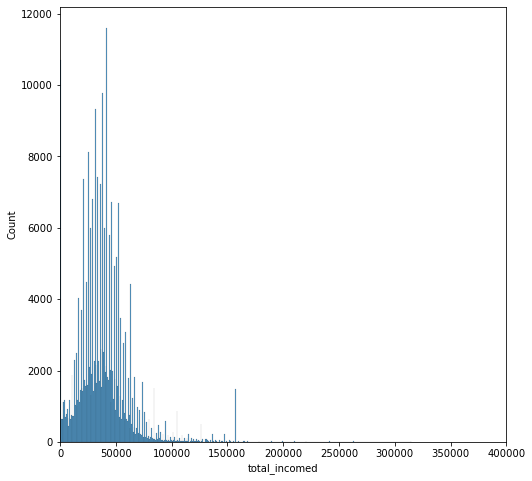

In [26]:
plot_distribution(msample_1980, "total_incomed")
msample_1980["total_incomed"].mean()

<AxesSubplot:>

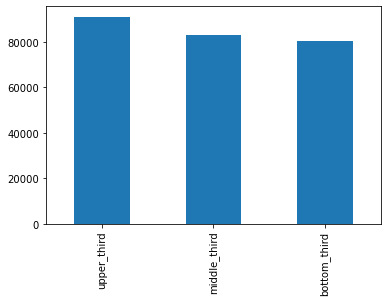

In [27]:
msample_1980['husband_distribution'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Total Income Dad', ylabel='Density'>

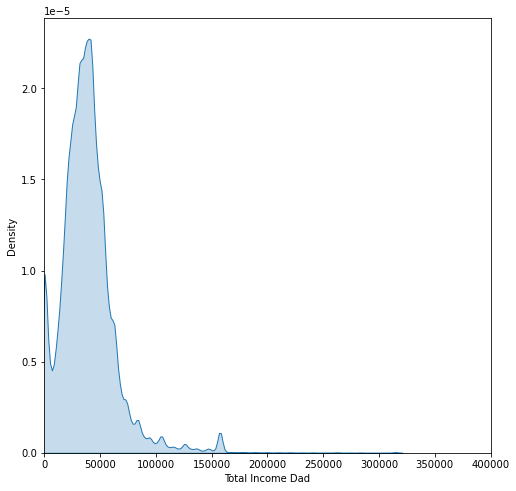

In [28]:
income_dad_density=plt.figure(figsize=(8,8))
income_dad_density=plt.xlim(0,400000)
income_dad_density=plt.xlabel('Total Income Dad')
income_dad_density=plt.ylabel('Density')
income_dad_density=sns.kdeplot(msample_1980['total_incomed'],shade=True)
income_dad_density

**Table 2| Part 1: Descriptive Statistics, Women aged 21-35 with 2 or more children - 1980 PUMS**

In [348]:
#Table 2 for 1980
table1_1=table_sum_stats(data_all_women_1980)
table1_2=table_sum_stats(msample_1980)
table1_3=table_sum_stats_husbands(msample_1980)
data_frames = [table1_1, table1_2, table1_3]
Table2_1980 = reduce(lambda  left,right: pd.merge(left,right,on=['Variable'],
                                            how='left'), data_frames)

Table2_1980.rename(columns = {'Mean_x':'All women (mean)', 
                       'Std. Dev._x':'All women (std.dev)',
                       'Mean_y':'Married women (mean)',
                      'Std. Dev._y':'Married women (std.dev)',
                      'Mean':'Husbands (mean)',
                      'Std. Dev.':'Husbands (std.dev)'}, 
            inplace = True)

Table2_1980=Table2_1980[["Variable", "All women (mean)", "All women (std.dev)", "Married women (mean)", "Married women (std.dev)", 'Husbands (mean)', "Husbands (std.dev)"]]
Table2_1980 = Table2_1980.replace(np.nan, '-', regex=True)

print("The sample of all women for 1980 has", len(data_all_women_1980), "observations, while the sample for married couples has" , len(msample_1980), "observations")
Table2_1980

The sample of all women for 1980 has 394840 observations, while the sample for married couples has 254652 observations


,Variable,All women (mean),All women (std.dev),Married women (mean),Married women (std.dev),Husbands (mean),Husbands (std.dev)
0,Children ever born,2.552,0.808,2.508,0.769,-,-
1,More than two children,0.402,0.490,0.381,0.486,-,-
2,First child was a boy,0.511,0.500,0.514,0.500,-,-
3,Second child was a boy,0.511,0.500,0.512,0.500,-,-
4,First two children were boys,0.264,0.441,0.266,0.442,-,-
5,First two children were girls,0.242,0.428,0.239,0.427,-,-
6,First two children were the same sex,0.505,0.500,0.505,0.500,-,-
7,Second birth was a twin,0.009,0.092,0.008,0.091,-,-
8,Age,30.125,3.510,30.393,3.386,33.035,4.564
9,Age at first birth,20.515,2.938,21.216,2.904,24.352,3.989


**Table 2| Part 2: Descriptive Statistics, Women aged 21-35 with 2 or more children - 1990 PUMS**

In [349]:
#Table 2 for 1990
table1_1=table_sum_stats(data_all_women_1990)
table1_2=table_sum_stats(msample_1990)
table1_3=table_sum_stats_husbands(msample_1990)
data_frames = [table1_1, table1_2, table1_3]
Table2_1990 = reduce(lambda  left,right: pd.merge(left,right,on=['Variable'],
                                            how='left'), data_frames)

Table2_1990.rename(columns = {'Mean_x':'All women (mean)', 
                       'Std. Dev._x':'All women (std.dev)',
                       'Mean_y':'Married women (mean)',
                      'Std. Dev._y':'Married women (std.dev)',
                      'Mean':'Husbands (mean)',
                      'Std. Dev.':'Husbands (std.dev)'}, 
            inplace = True)

Table2_1990=Table2_1990[["Variable", "All women (mean)", "All women (std.dev)", "Married women (mean)", "Married women (std.dev)", 'Husbands (mean)', "Husbands (std.dev)"]]
Table2_1990 = Table2_1990.replace(np.nan, '-', regex=True)
print("The sample of all women for 1990 has", len(data_all_women_1990), "observations, while the sample for married couples has" , len(msample_1990), "observations")
Table2_1990

The sample of all women for 1990 has 380007 observations, while the sample for married couples has 301595 observations


,Variable,All women (mean),All women (std.dev),Married women (mean),Married women (std.dev),Husbands (mean),Husbands (std.dev)
0,Children ever born,2.495,0.767,2.477,0.747,-,-
1,More than two children,0.370,0.483,0.363,0.481,-,-
2,First child was a boy,0.513,0.500,0.514,0.500,-,-
3,Second child was a boy,0.511,0.500,0.512,0.500,-,-
4,First two children were boys,0.264,0.441,0.265,0.441,-,-
5,First two children were girls,0.240,0.427,0.238,0.426,-,-
6,First two children were the same sex,0.504,0.500,0.503,0.500,-,-
7,Second birth was a twin,0.018,0.131,0.016,0.127,-,-
8,Age,30.434,3.463,30.658,3.339,33.461,4.764
9,Age at first birth,21.809,3.487,22.278,3.459,25.08,4.695


Table 2 part 1 provides information on statistics and variable definition for covariates, instruments and dependent variables later used in the empirical analysis for the 1980 census data, while Table 2 part 2 provides the same information for 1990 census data. 

The covariate of main interest is *more than two children* and the first instrumental variable for this covariate is *same sex*, described as if the first two children were the same gender. The table also shows the two components of *same sex*, which are *two boys* and *two girls*. Just as stated in Angrist and Evans (1998), among all the women who already had a second child, 40.2 percent had a third, where the correspoding fraction for the 1990 sample is 37 percent. For both samples, around 50% of all the families with two childs have children of the same gender and above 51% of first births correspond to a boy.

Meanwhile, another instrument used in the empirical analysis correspond to multiple births, or *twins*. In the 1980 PUMS, multiple births is constructed as siblings who have the same age and quarter of birth (note: for the construction of this indicator, the age of the second and third child was used; this means, the twin birth corresponds to the mother's second birth). For the 1980 PUMS, the mean of *twins* is 0.09 for the sample of all women and 0.08 for the sample of married women. Since the variable quarter of birth is not reported for the 1990 PUMS dataset, the multiple birth variable was defined as children who have the same age.

In [390]:
#data["INCOME1D"].describe()
#data["INCOME2D"].describe()
#msample["qtrmar"].describe()
#sum(pd.isnull(data['agefstd']))

In [58]:
variables1=["(1) one girl", "(2) one boy", "difference (2) - (1)"]
frequencies1=['Fraction of sample', 'Fraction that had another child']

def Table_3_panel_1(data):
    Table_3_panel1 = pd.DataFrame(np.nan, index=variables1, columns=frequencies1)
    Table_3_panel1.index.name="Sex of first child in families with one or more children"
    a=pd.DataFrame(data['boy1st'].value_counts(normalize=True)*100)
    a1=a.iloc[(0,0)]
    b1=a.iloc[(1,0)]

    c=pd.DataFrame(data.groupby("boy1st")["more1k"].value_counts(normalize=True) * 100)
    c1=c.iloc[(0,0)]
    d1=c.iloc[(2,0)]
    diff1=d1-c1

    Table_3_panel1.iloc[0,0]=a1
    Table_3_panel1.iloc[1,0]=b1

    Table_3_panel1.iloc[0,1]=c1
    Table_3_panel1.iloc[1,1]=d1
    Table_3_panel1.iloc[2,1]=diff1

    return Table_3_panel1

In [59]:
variables=["(1) one girl one boy", "(2) two boys", "(3) two girls", "(4) both same sex", "Difference (4) - (1)"]
frequencies=['Fraction of sample', 'Fraction that had another child']

def Table_3_panel_2(data):
    
    Table_3_panel2 = pd.DataFrame(np.nan, index=variables, columns=frequencies)
    Table_3_panel2.index.name="Sex of first child in families with two or more children"
    a2=pd.DataFrame(data['mixed_sex'].value_counts(normalize=True)*100)
    a2=a2.iloc[(1,0)]
    b2=pd.DataFrame(data['two_boys'].value_counts(normalize=True)*100)
    b2=b2.iloc[(1,0)]
    c2=pd.DataFrame(data['two_girls'].value_counts(normalize=True)*100)
    c2=c2.iloc[(1,0)]
    d2=pd.DataFrame(data['same_sex'].value_counts(normalize=True)*100)
    d2=d2.iloc[(0,0)]

    f2=pd.DataFrame(data.groupby("mixed_sex")["more3k"].value_counts(normalize=True) * 100)
    f2=f2.iloc[(3,0)]
    g2=pd.DataFrame(data.groupby("two_boys")["more3k"].value_counts(normalize=True) * 100)
    g2=g2.iloc[(3,0)]
    h2=pd.DataFrame(data.groupby("two_girls")["more3k"].value_counts(normalize=True) * 100)
    h2=h2.iloc[(3,0)]
    i2=pd.DataFrame(data.groupby("same_sex")["more3k"].value_counts(normalize=True) * 100)
    i2=i2.iloc[(3,0)]
    diff2=(i2-f2)/100
    #sd_diff2=np.sum(np.square(diff2))

    Table_3_panel2.iloc[0,0]=a2
    Table_3_panel2.iloc[1,0]=b2
    Table_3_panel2.iloc[2,0]=c2
    Table_3_panel2.iloc[3,0]=d2
    Table_3_panel2.iloc[4,0]="-"
    #Table_3_panel2.iloc[5,0]="-"

    Table_3_panel2.iloc[0,1]=f2
    Table_3_panel2.iloc[1,1]=g2
    Table_3_panel2.iloc[2,1]=h2
    Table_3_panel2.iloc[3,1]=i2
    Table_3_panel2.iloc[4,1]=diff2
    #Table_3_panel2.iloc[5,1]=sd_diff2

    return Table_3_panel2


In [34]:
Table3_1_1=Table_3_panel_1(data_1980)
Table3_1_2=Table_3_panel_1(msample_total_1980)
Table3_2_1=Table_3_panel_2(data_all_women_1980)
Table3_2_2=Table_3_panel_2(msample_1980)

keys = ['All women, PUMS 1980', 'Married women, PUMS 1980']
frames1 = [Table3_1_1, Table3_1_2]
frames2 = [Table3_2_1, Table3_2_2]
table3_1 = pd.concat(frames1, axis=1, keys=keys) 
table3_2 = pd.concat(frames2, axis=1, keys=keys)

In [35]:
table3_1

All women, PUMS 1980  \
                                                     Fraction of sample   
Sex of first child in families with one or more...                        
(1) one girl                                                  51.182453   
(2) one boy                                                   48.817547   
difference (2) - (1)                                                NaN   

                                                                                    \
                                                   Fraction that had another child   
Sex of first child in families with one or more...                                   
(1) one girl                                                             70.614511   
(2) one boy                                                              70.695410   
difference (2) - (1)                                                      0.080899   

                                                   Married women, PUMS 1980  \
                                                         Fraction of sample   
Sex of first child in families with one or more...                            
(1) one girl                                                      51.494825   
(2) one boy                                                       48.505175   
difference (2) - (1)                                                    NaN   

                                                                                    
                                                   Fraction that had another child  
Sex of first child in families with one or more...                                  
(1) one girl                                                             71.398612  
(2) one boy                                                              71.351937  
difference (2) - (1)                                                     -0.046675

In [82]:
table3_2

All women, PUMS 1980  \
                                                     Fraction of sample   
Sex of first child in families with two or more...                        
(1) one girl one boy                                             49.461   
(2) two boys                                                    26.3719   
(3) two girls                                                    24.167   
(4) both same sex                                                50.539   
Difference (4) - (1)                                                  -   

                                                                                    \
                                                   Fraction that had another child   
Sex of first child in families with two or more...                                   
(1) one girl one boy                                                     37.197120   
(2) two boys                                                             42.268576   
(3) two girls                                                            44.115027   
(4) both same sex                                                        43.151522   
Difference (4) - (1)                                                      0.059544   

                                                   Married women, PUMS 1980  \
                                                         Fraction of sample   
Sex of first child in families with two or more...                            
(1) one girl one boy                                                49.4652   
(2) two boys                                                        26.6073   
(3) two girls                                                       23.9276   
(4) both same sex                                                   50.5348   
Difference (4) - (1)                                                      -   

                                                                                    
                                                   Fraction that had another child  
Sex of first child in families with two or more...                                  
(1) one girl one boy                                                     34.674193  
(2) two boys                                                             40.383140  
(3) two girls                                                            42.463730  
(4) both same sex                                                        41.368271  
Difference (4) - (1)                                                      0.066941

In [91]:
def families_one_more_kid(data):
    
    data_2=data[((data['AGEM']>=21) & (data['AGEM']<=35)) & (data['KIDCOUNT']>=1)].copy()

    data_2.index = range(len(data_2.index))
    
    return data_2

In [92]:
data_all_women_1990_one=families_one_more_kid(data_1990)

In [94]:
#creating the sample for married couples 1990

msample_1990_one=data_all_women_1990_one[(data_all_women_1990_one['MARITAL']==0) & (data_all_women_1990_one['agefstd']>=15) &
            (data_all_women_1990_one['agefstm']>=15) & (data_all_women_1990_one["AGED"]!=np.NaN)]

In [96]:
Table3_1_3=Table_3_panel_1(data_all_women_1990_one)
Table3_1_4=Table_3_panel_1(msample_1990_one)
Table3_2_3=Table_3_panel_2(data_all_women_1990)
Table3_2_4=Table_3_panel_2(msample_1990)

keys = ['All women, PUMS 1990', 'Married women, PUMS 1990']
frames1 = [Table3_1_3, Table3_1_4]
frames2 = [Table3_2_3, Table3_2_4]
table3_3 = pd.concat(frames1, axis=1, keys=keys) 
table3_4 = pd.concat(frames2, axis=1, keys=keys)

In [97]:
table3_3

All women, PUMS 1990  \
                                                     Fraction of sample   
Sex of first child in families with one or more...                        
(1) one girl                                                  51.150563   
(2) one boy                                                   48.849437   
difference (2) - (1)                                                NaN   

                                                                                    \
                                                   Fraction that had another child   
Sex of first child in families with one or more...                                   
(1) one girl                                                             66.624590   
(2) one boy                                                              66.921777   
difference (2) - (1)                                                      0.297187   

                                                   Married women, PUMS 1990  \
                                                         Fraction of sample   
Sex of first child in families with one or more...                            
(1) one girl                                                      51.367485   
(2) one boy                                                       48.632515   
difference (2) - (1)                                                    NaN   

                                                                                    
                                                   Fraction that had another child  
Sex of first child in families with one or more...                                  
(1) one girl                                                             70.009370  
(2) one boy                                                              70.204521  
difference (2) - (1)                                                      0.195151

In [98]:
table3_4

All women, PUMS 1990  \
                                                     Fraction of sample   
Sex of first child in families with two or more...                        
(1) one girl one boy                                            49.5735   
(2) two boys                                                    26.3891   
(3) two girls                                                   24.0374   
(4) both same sex                                               50.4265   
Difference (4) - (1)                                                  -   

                                                                                    \
                                                   Fraction that had another child   
Sex of first child in families with two or more...                                   
(1) one girl one boy                                                     33.870154   
(2) two boys                                                             39.687494   
(3) two girls                                                            40.714184   
(4) both same sex                                                        40.176899   
Difference (4) - (1)                                                      0.063067   

                                                   Married women, PUMS 1990  \
                                                         Fraction of sample   
Sex of first child in families with two or more...                            
(1) one girl one boy                                                49.7173   
(2) two boys                                                        26.4712   
(3) two girls                                                       23.8114   
(4) both same sex                                                   50.2827   
Difference (4) - (1)                                                      -   

                                                                                    
                                                   Fraction that had another child  
Sex of first child in families with two or more...                                  
(1) one girl one boy                                                     32.766037  
(2) two boys                                                             39.181352  
(3) two girls                                                            40.355348  
(4) both same sex                                                        39.737300  
Difference (4) - (1)                                                      0.069713

In [23]:
#aux
def OLS_Regressions_more2k(data1, data2):
    
    model1_table6=sm_api.OLS(data1["more2k"], sm_api.add_constant(data1["same_sex"])).fit()
    model2_table6=sm_api.OLS(data1["more2k"], sm_api.add_constant(data1[["same_sex", "boy1st", "boy2nd", "AGEM", 'agefstm', "blackm", "hispm", "otheracem"]])).fit()
    model3_table6=sm_api.OLS(data1["more2k"], sm_api.add_constant(data1[["boy1st", "two_boys", "two_girls", "AGEM", 'agefstm', "blackm", "hispm", "otheracem"]])).fit()
    model4_table6=sm_api.OLS(data2["more2k"], sm_api.add_constant(data2["same_sex"])).fit()
    model5_table6=sm_api.OLS(data2["more2k"], sm_api.add_constant(data2[["same_sex", "boy1st", "boy2nd", "AGEM", 'agefstm', "blackm", "hispm", "otheracem"]])).fit()
    model6_table6=sm_api.OLS(data2["more2k"], sm_api.add_constant(data2[["boy1st", "two_boys", "two_girls", "AGEM", 'agefstm', "blackm", "hispm", "otheracem"]])).fit()
    Table = Stargazer([model1_table6, model2_table6, model3_table6, model4_table6, model5_table6, model6_table6])

    Table.custom_columns(['All women', 'All women', 'All women', 'Married women', 'Married women', 'Married women'], 
                         [1, 1, 1, 1, 1, 1])
    Table.significant_digits(4)
    #Table.custom_columns('All women')
    
    return Table

**Table 6 Part 1: OLS Estimates of *More than 2 children* equations for 1980 PUMS**

In [37]:
OLS_Regressions_more2k(data_all_women_1980, msample_1980)

**Table 6 Part 2: OLS Estimates of *More than 2 children* equations for 1990 PUMS**

In [24]:
OLS_Regressions_more2k(data_all_women_1990, msample_1990)

Table 7: 

In [112]:
#aux
def OLS_Labor_Supply_Models(data, outcomes, controls_1, controls_2, controls_3):

    table = pd.DataFrame(
        {
            "OLS (1)": [],
            "Std.err (1)": [],
            "IV-same sex (2)": [],
            "Std.err (2)": [],
            "IV-two girls, two boys (3)": [],
            "Std.err (3)": [],
        }
    )
    table["outcomes"] = outcomes
    table = table.set_index("outcomes")

    for outcome in outcomes:

        data=data
        model_OLS=sm_api.OLS(data[outcome], (data[controls_1]))
        result_OLS=model_OLS.fit()
        model_IV_1=IV2SLS(data[outcome], data[controls_2], data["more2k"], data["same_sex"])
        result_IV_1=model_IV_1.fit()
        model_IV_2=IV2SLS(data[outcome], data[controls_3], data["more2k"], data[["two_boys","two_girls"]])
        result_IV_2=model_IV_2.fit()        
        
        outputs = [
                result_OLS.params["more2k"],
                result_OLS.bse["more2k"],
                result_IV_1.params["more2k"],
                result_IV_1.std_errors["more2k"],
                result_IV_2.params["more2k"],
                result_IV_2.std_errors["more2k"],
            
        ]
        
        table.loc[outcome] = outputs
        table = table.round(3)

    return table

In [113]:
outcomes_labor_supply_moms=["workedm", "WEEKSM", "HOURSM", "total_incomem", "faminc_log", "nonmomi_log"]
outcomes_labor_supply_dads=["workedd", "WEEKSD", "HOURSD", "total_incomed", "faminc_log", "nonmomi_log"]
controls_OLS_moms = ["const", "more2k", 'AGEM', 'agefstm', "boy1st", "boy2nd", "blackm", "hispm", "otheracem"]
controls_IV_1_moms=["const", 'AGEM', 'agefstm', "boy1st", "boy2nd", "blackm", "hispm", "otheracem"]
controls_IV_2_moms=["const", 'AGEM', 'agefstm', "boy1st", "blackm", "hispm", "otheracem"]
controls_OLS_dads = ["const", "more2k", 'AGED', 'agefstd', "boy1st", "boy2nd", "blackd", "hispd", "otheraced"]
controls_IV_1_dads=["const", 'AGED', 'agefstd', "boy1st", "boy2nd", "blackd", "hispm", "otheraced"]
controls_IV_2_dads=["const", 'AGED', 'agefstd', "boy1st", "blackd", "hispd", "otheraced"]

In [40]:
Table7_1=OLS_Labor_Supply_Models(data_all_women_1980, outcomes_labor_supply_moms, controls_OLS_moms, controls_IV_1_moms, controls_IV_2_moms)
Table7_2=OLS_Labor_Supply_Models(msample_1980, outcomes_labor_supply_moms, controls_OLS_moms, controls_IV_1_moms, controls_IV_2_moms)
Table7_3=OLS_Labor_Supply_Models(msample_1980, outcomes_labor_supply_dads, controls_OLS_dads, controls_IV_1_dads, controls_IV_2_dads)

keys=["All women", "Married Women", "Husbands"]
frames=[Table7_1, Table7_2, Table7_3]
Table7=pd.concat(frames, axis=1, keys=keys)
Table7 = Table7.replace(np.nan, '-', regex=True)
Table7

All women                                          \
                OLS (1) Std.err (1) IV-same sex (2) Std.err (2)   
workedm          -0.177       0.002          -0.117       0.025   
WEEKSM           -8.998       0.072          -5.548       1.117   
HOURSM           -6.667       0.062          -4.536       0.953   
total_incomem   -3768.2      35.391        -1900.04      546.19   
faminc_log       -0.137       0.004          -0.026       0.068   
nonmomi_log       0.208       0.008           0.113       0.121   
workedd               -           -               -           -   
WEEKSD                -           -               -           -   
HOURSD                -           -               -           -   
total_incomed         -           -               -           -   

                                                     Married Women  \
              IV-two girls, two boys (3) Std.err (3)       OLS (1)   
workedm                            -0.11       0.025        -0.167   
WEEKSM                            -5.252        1.11        -8.044   
HOURSM                            -4.298       0.946         -5.99   
total_incomem                   -1810.25     542.853       -3148.3   
faminc_log                        -0.034       0.068         -0.14   
nonmomi_log                        0.075       0.121        -0.062   
workedd                                -           -             -   
WEEKSD                                 -           -             -   
HOURSD                                 -           -             -   
total_incomed                          -           -             -   

                                                       \
              Std.err (1) IV-same sex (2) Std.err (2)   
workedm             0.002          -0.117       0.028   
WEEKSM              0.089          -5.252       1.217   
HOURSM              0.075          -4.763       1.022   
total_incomem      42.068        -1270.72     573.312   
faminc_log          0.004          -0.045       0.059   
nonmomi_log         0.005           0.033       0.071   
workedd                 -               -           -   
WEEKSD                  -               -           -   
HOURSD                  -               -           -   
total_incomed           -               -           -   

                                                     Husbands              \
              IV-two girls, two boys (3) Std.err (3)  OLS (1) Std.err (1)   
workedm                           -0.109       0.028        -           -   
WEEKSM                            -5.014       1.208        -           -   
HOURSM                            -4.531       1.014        -           -   
total_incomem                   -1254.12     569.842        -           -   
faminc_log                        -0.049       0.059    -0.16       0.004   
nonmomi_log                        0.022        0.07   -0.084       0.005   
workedd                                -           -   -0.008       0.001   
WEEKSD                                 -           -   -0.901       0.044   
HOURSD                                 -           -    0.152       0.052   
total_incomed                          -           - -1763.01     103.695   

                                                                      \
              IV-same sex (2) Std.err (2) IV-two girls, two boys (3)   
workedm                     -           -                          -   
WEEKSM                      -           -                          -   
HOURSM                      -           -                          -   
total_incomem               -           -                          -   
faminc_log             -0.045        0.06                     -0.051   
nonmomi_log             0.032       0.071                      0.019   
workedd                 0.004       0.009                      0.001   
WEEKSD                  0.593       0.601                      0.408   
HOURSD                  0.525       0.

Table 8

In [114]:
Table8_1=OLS_Labor_Supply_Models(data_all_women_1990, outcomes_labor_supply_moms, controls_OLS_moms, controls_IV_1_moms, controls_IV_2_moms)
Table8_2=OLS_Labor_Supply_Models(msample_1990, outcomes_labor_supply_moms, controls_OLS_moms, controls_IV_1_moms, controls_IV_2_moms)
Table8_3=OLS_Labor_Supply_Models(msample_1990, outcomes_labor_supply_dads, controls_OLS_dads, controls_IV_1_dads, controls_IV_2_dads)

keys=["All women", "Married Women", "Husbands"]
frames=[Table8_1, Table8_2, Table8_3]
Table8=pd.concat(frames, axis=1, keys=keys)
Table8 = Table8.replace(np.nan, '-', regex=True)
Table8

All women                                          \
                OLS (1) Std.err (1) IV-same sex (2) Std.err (2)   
workedm          -0.154       0.002          -0.095       0.024   
WEEKSM           -8.725       0.077          -5.482       1.156   
HOURSM           -6.739       0.065          -4.121       0.973   
total_incomem  -3934.58      43.966        -1821.33     656.476   
faminc_log       -0.131       0.005          -0.107        0.07   
nonmomi_log       0.244       0.009          -0.075       0.131   
workedd               -           -               -           -   
WEEKSD                -           -               -           -   
HOURSD                -           -               -           -   
total_incomed         -           -               -           -   

                                                     Married Women  \
              IV-two girls, two boys (3) Std.err (3)       OLS (1)   
workedm                           -0.095       0.024        -0.147   
WEEKSM                            -5.465       1.156        -8.256   
HOURSM                            -4.132       0.973        -6.336   
total_incomem                   -1822.06     656.377      -3705.32   
faminc_log                        -0.106        0.07        -0.109   
nonmomi_log                       -0.074       0.131        -0.012   
workedd                                -           -             -   
WEEKSD                                 -           -             -   
HOURSD                                 -           -             -   
total_incomed                          -           -             -   

                                                       \
              Std.err (1) IV-same sex (2) Std.err (2)   
workedm             0.002            -0.1       0.024   
WEEKSM              0.087          -5.232       1.162   
HOURSM              0.073          -3.873       0.964   
total_incomem      50.238         -1991.8     667.677   
faminc_log          0.004          -0.029       0.052   
nonmomi_log         0.005            0.04       0.068   
workedd                 -               -           -   
WEEKSD                  -               -           -   
HOURSD                  -               -           -   
total_incomed           -               -           -   

                                                     Husbands              \
              IV-two girls, two boys (3) Std.err (3)  OLS (1) Std.err (1)   
workedm                             -0.1       0.024        -           -   
WEEKSM                            -5.228       1.162        -           -   
HOURSM                            -3.875       0.964        -           -   
total_incomem                   -1992.21     667.648        -           -   
faminc_log                        -0.029       0.052   -0.129       0.004   
nonmomi_log                         0.04       0.068   -0.031       0.005   
workedd                                -           -   -0.011       0.001   
WEEKSD                                 -           -   -1.038       0.046   
HOURSD                                 -           -    0.037       0.052   
total_incomed                          -           -  429.033     115.176   

                                                                      \
              IV-same sex (2) Std.err (2) IV-two girls, two boys (3)   
workedm                     -           -                          -   
WEEKSM                      -           -                          -   
HOURSM                      -           -                          -   
total_incomem               -           -                          -   
faminc_log             -0.024       0.053                     -0.023   
nonmomi_log             0.045       0.068                      0.045   
workedd                 0.009       0.009                       0.01   
WEEKSD                  0.795       0.618                       0.81   
HOURSD                   0.46       0.

Table 9

In [352]:
#aux
#FUNCTION OLS FOR TABLE 9 for wifes

def OLS_Labor_Supply_Interactions_wifes(data, Interaction, outcome):
    
    table = pd.DataFrame(
        {
            "OLS (1)": [],
            "Std.err (1)": [],

        }
    )
    table["Interactions"] = Interaction
    table = table.set_index("Interactions")
    table

    for interaction in Interaction:

        mod=sm_api.OLS(data[outcome], data[[interaction, "more2k", "AGEM", "agefstm", "boy1st", "boy2nd", "blackm", "hispm", "otheracem"]])
        results_mod=mod.fit()


        outputs = [
                results_mod.params["more2k"],
                results_mod.bse["more2k"],
        ]

        table.loc[interaction] = outputs

    return table

In [353]:
#aux
#FUNCTION OLS FOR TABLE 9 for husbands

def OLS_Labor_Supply_Interactions_husbands(data1, data2, data3, Interaction, outcome):
    
    table = pd.DataFrame(
        {
            "OLS (1)": [],
            "Std.err (1)": [],

        }
    )
    table["Interactions"] = Interaction
    table = table.set_index("Interactions")
    table
    
    
    mod1=sm_api.OLS(data1[outcome], data1[["const", "more2k", "AGED", "agefstd", "boy1st", "boy2nd", "blackd", "hispd", "otheraced"]])
    results_mod1=mod1.fit()
    
    mod2=sm_api.OLS(data2[outcome], data2[["const", "more2k", "AGED", "agefstd", "boy1st", "boy2nd", "blackd", "hispd", "otheraced"]])
    results_mod2=mod2.fit()

    mod3=sm_api.OLS(data3[outcome], data3[["const", "more2k", "AGED", "agefstd", "boy1st", "boy2nd", "blackd", "hispd", "otheraced"]])
    results_mod3=mod3.fit()


    outputs1 = [results_mod1.params["more2k"], results_mod1.bse["more2k"],]
    outputs2 = [results_mod2.params["more2k"], results_mod2.bse["more2k"],]
    outputs3 = [results_mod3.params["more2k"], results_mod3.bse["more2k"],]

    table.loc["more2k_lessgrad_husbands"] = outputs1
    table.loc["more2k_hsgrad_husbands"] = outputs2
    table.loc["more2k_moregrad_husbands"] = outputs3

    return table

In [354]:
#FUNCTION OLS (FIRST STAGE) FOR TABLE 9 
#WIFES

def OLS_Labor_Supply_First_Stage_wifes(data, Interaction, outcome):
    
    table = pd.DataFrame(
        {
            "OLS (1)": [],
            "Std.err (1)": [],

        }
    )
    table["Interactions"] = Interaction
    table = table.set_index("Interactions")
    table

    for interaction in Interaction:

        mod=sm_api.OLS(data[outcome], data[[interaction, "same_sex", "AGEM", "agefstm", "boy1st", "boy2nd", "blackm", "hispm", "otheracem"]])
        results_mod=mod.fit()


        outputs = [
                results_mod.params["same_sex"],
                results_mod.bse["same_sex"],
        ]

        table.loc[interaction] = outputs

    return table


In [355]:
#FUNCTION OLS (FIRST STAGE) FOR TABLE 9 


def OLS_Labor_Supply_First_Stage_husbands(data, Interaction, outcome):
    
    table = pd.DataFrame(
        {
            "OLS (1)": [],
            "Std.err (1)": [],

        }
    )
    table["Interactions"] = Interaction
    table = table.set_index("Interactions")
    table

    for interaction in Interaction:

        mod=sm_api.OLS(data[outcome], data[[interaction, "same_sex", "AGED", "agefstd", "boy1st", "boy2nd", "blackd", "hispd", "otheraced"]])
        results_mod=mod.fit()


        outputs = [
                results_mod.params["same_sex"],
                results_mod.bse["same_sex"],
        ]

        table.loc[interaction] = outputs

    return table

In [27]:
Interaction1="more2k_bottomthird", "more2k_middlethird", "more2k_upperthird", "more2k_lessgrad", "more2k_hsgrad", "more2k_moregrad",    
outcome="workedm"
#Table9_1=OLS_Labor_Supply_Interactions_wifes(msample_1980, Interaction1, "workedm")

Interaction2="more2k_lessgrad_earnings", "more2k_hsgrad_earnings", "more2k_moregrad_earnings" 
outcome="workedm"
#Table9_1_2=OLS_Labor_Supply_Interactions_wifes(sample_middle_third, Interaction2, "workedm")

Interaction3="more2k_lessgrad_husbands", "more2k_hsgrad_husbands", "more2k_moregrad_husbands" 
outcome="workedd"
#Table9_1_3=OLS_Labor_Supply_Interactions_husbands(sample01, sample02, sample03, Interaction3, "workedd")

#frames=[Table9_1, Table9_1_2, Table9_1_3]
#Table9_OLS_worked=pd.concat(frames, axis=0)

In [357]:
Interaction4="samesex_bottomthird", "samesex_middlethird", "samesex_upperthird", "samesex_lessgrad", "samesex_hsgrad", "samesex_moregrad",       
outcome="more2k"
#Table9_1_4=OLS_Labor_Supply_First_Stage_wifes(msample_1980, Interaction4, "more2k")

Interaction5="samesex_lessgrad_earnings", "samesex_hsgrad_earnings", "samesex_moregrad_earnings",       
outcome="more2k"
#Table9_1_5=OLS_Labor_Supply_First_Stage_wifes(sample_middle_third, Interaction5, "more2k")

Interaction6="samesex_lessgrad", "samesex_hsgrad", "samesex_moregrad",       
outcome="more2k"
#Table9_1_6=OLS_Labor_Supply_First_Stage_husbands(msample_1980, Interaction6, "more2k")

#Table9_OLS_fs=pd.concat([Table9_1_4, Table9_1_5, Table9_1_6], axis=0)
#Table9_OLS_fs.index=Table9_OLS_worked.index

In [221]:
#AUX
def IV_Labor_Supply_Interactions(data, data2, data3, data4, data5, outcome, outcome2):
    
    table = pd.DataFrame(
        {
            "IV (2)": [],
            "Std.err (2)": [],

        }
    )
    table["Interactions"] = [
        "more2k_bottomthird", 
        "more2k_middlethird", 
        "more2k_upperthird", 
        "more2k_lessgrad", 
        "more2k_hsgrad", 
        "more2k_moregrad",
        "more2k_lessgrad_earnings", 
        "more2k_hsgrad_earnings", 
        "more2k_moregrad_earnings",
        "more2k_lessgrad_husbands",
        "more2k_hsgrad_husbands",
        "more2k_moregrad_husbands",
    ]
    
    table = table.set_index("Interactions")
    table

    model_IV_1=IV2SLS(data[outcome], data[["const", "bottom_third", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data["more2k_bottomthird"], data["samesex_bottomthird"]).fit() 
    model_IV_2=IV2SLS(data[outcome], data[["const", "middle_third", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data["more2k_middlethird"], data["samesex_middlethird"]).fit()  
    model_IV_3=IV2SLS(data[outcome], data[["const", "upper_third", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data["more2k_upperthird"], data["samesex_upperthird"]).fit()  

    model_IV_4=IV2SLS(data[outcome], data[["const", "lessgrad", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data["more2k_lessgrad"], data["samesex_lessgrad"]).fit() 
    model_IV_5=IV2SLS(data[outcome], data[["const", "hsgrad", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data["more2k_hsgrad"], data["samesex_hsgrad"]).fit()  
    model_IV_6=IV2SLS(data[outcome], data[["const", "moregrad", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data["more2k_moregrad"], data["samesex_moregrad"]).fit() 
    
    model_IV_7=IV2SLS(data2[outcome], data2[["const", "lessgrad", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data2["more2k_lessgrad_earnings"], data2["samesex_lessgrad_earnings"]).fit() 
    model_IV_8=IV2SLS(data2[outcome], data2[["const", "hsgrad", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data2["more2k_hsgrad_earnings"], data2["samesex_hsgrad_earnings"]).fit()  
    model_IV_9=IV2SLS(data2[outcome], data2[["const", "moregrad", "AGEM", "agefstm", "boy1st", "blackm", "hispm", "otheracem"]], data2["more2k_moregrad_earnings"], data2["samesex_moregrad_earnings"]).fit()
    
    model_IV_10=IV2SLS(data3[outcome2], data3[["const", "AGED", "agefstd", "boy1st", "blackd", "hispd", "otheraced"]], data3["more2k"], data3["same_sex"]).fit() 
    model_IV_11=IV2SLS(data4[outcome2], data4[["const", "AGED", "agefstd", "boy1st", "blackd", "hispd", "otheraced"]], data4["more2k"], data4["same_sex"]).fit()   
    model_IV_12=IV2SLS(data5[outcome2], data5[["const", "AGED", "agefstd", "boy1st", "blackd", "hispd", "otheraced"]], data5["more2k"], data5["same_sex"]).fit()   
    
    outputs1 = [model_IV_1.params["more2k_bottomthird"],model_IV_1.std_errors["more2k_bottomthird"],]
    outputs2 = [model_IV_2.params["more2k_middlethird"],model_IV_2.std_errors["more2k_middlethird"],]
    outputs3 = [model_IV_3.params["more2k_upperthird"],model_IV_3.std_errors["more2k_upperthird"],]

    outputs4 = [model_IV_4.params["more2k_lessgrad"],model_IV_4.std_errors["more2k_lessgrad"],]
    outputs5 = [model_IV_5.params["more2k_hsgrad"],model_IV_5.std_errors["more2k_hsgrad"],]
    outputs6 = [model_IV_6.params["more2k_moregrad"],model_IV_6.std_errors["more2k_moregrad"],]

    outputs7 = [model_IV_7.params["more2k_lessgrad_earnings"],model_IV_7.std_errors["more2k_lessgrad_earnings"],]
    outputs8 = [model_IV_8.params["more2k_hsgrad_earnings"],model_IV_8.std_errors["more2k_hsgrad_earnings"],]
    outputs9 = [model_IV_9.params["more2k_moregrad_earnings"],model_IV_9.std_errors["more2k_moregrad_earnings"],]
    
    outputs10 = [model_IV_10.params["more2k"],model_IV_10.std_errors["more2k"],]
    outputs11 = [model_IV_11.params["more2k"],model_IV_11.std_errors["more2k"],]
    outputs12 = [model_IV_12.params["more2k"],model_IV_12.std_errors["more2k"],]
    
    table.loc["more2k_bottomthird"] = outputs1
    table.loc["more2k_middlethird"] = outputs2
    table.loc["more2k_upperthird"] = outputs3
    table.loc["more2k_lessgrad"] = outputs4
    table.loc["more2k_hsgrad"] = outputs5
    table.loc["more2k_moregrad"] = outputs6
    table.loc["more2k_lessgrad_earnings"] = outputs7
    table.loc["more2k_hsgrad_earnings"] = outputs8
    table.loc["more2k_moregrad_earnings"] = outputs9
    table.loc["more2k_lessgrad_husbands"] = outputs10
    table.loc["more2k_hsgrad_husbands"] = outputs11
    table.loc["more2k_moregrad_husbands"] = outputs12
    
    

    return table

In [205]:
Table9_IV_worked=IV_Labor_Supply_Interactions(msample_1980, sample_middle_third, sample01, sample02, sample03, "workedm", "workedd")

**Table 9| Part 1 : OLS and 2SLS Estimates for Labor Supply Models with Interaction Terms Using 1980 Census Data with *Worked for pay* as dependent variable**

In [26]:
#AUX
def mean_samples(data, Variables_list, outcome):
    
    table = pd.DataFrame(
        {
            "Mean Dependent Variable": [],

        }
    )
    table["Variables"] = Variables_list

    table = table.set_index("Variables")

    for variable in Variables_list:

        a=data[data[variable]==1]
        mean=a[outcome].mean()
        mean=round(mean,3)

        table.loc[variable] = mean

    return table

In [361]:
Variables1=["bottom_third", "middle_third", "upper_third", "lessgrad", "hsgrad", "moregrad"]
#mean_1=mean_samples(msample_1980, Variables1, "workedm")

In [362]:
Variables2=["lessgrad", "hsgrad", "moregrad"]
#mean_2=mean_samples(sample_middle_third, Variables2, "workedm")

In [363]:
Variables3=["lessgrad", "hsgrad", "moregrad"]
#mean_3=mean_samples(msample_1980, Variables3, "workedd")

In [55]:
frames=[mean_1, mean_2, mean_3]
Table9_means_1=pd.concat(frames, axis=0)
Table9_means_1.index=Table9_OLS_worked.index

In [56]:
Table9_part1 = pd.concat([Table9_OLS_fs, Table9_means_1, Table9_OLS_worked, Table9_IV_worked], axis=1, keys=["First-Stage (more than 2 kids)", "", "OLS", "2SLS"])
Table9_part1

First-Stage (more than 2 kids)              \
                                                OLS (1) Std.err (1)   
Interactions                                                          
more2k_bottomthird                             0.061630    0.002060   
more2k_middlethird                             0.083158    0.002059   
more2k_upperthird                              0.082719    0.002072   
more2k_lessgrad                                0.055167    0.001953   
more2k_hsgrad                                  0.093014    0.002252   
more2k_moregrad                                0.086262    0.002053   
more2k_lessgrad_earnings                       0.063442    0.003348   
more2k_hsgrad_earnings                         0.095929    0.004020   
more2k_moregrad_earnings                       0.085590    0.003520   
more2k_lessgrad_husbands                       0.053978    0.001938   
more2k_hsgrad_husbands                         0.090774    0.002246   
more2k_moregrad_husbands                       0.085907    0.002054   

                                                       OLS              \
                         Mean Dependent Variable   OLS (1) Std.err (1)   
Interactions                                                             
more2k_bottomthird                         0.569 -0.179121    0.002362   
more2k_middlethird                         0.573 -0.178488    0.002318   
more2k_upperthird                          0.451 -0.116119    0.002356   
more2k_lessgrad                            0.468 -0.145462    0.002227   
more2k_hsgrad                              0.524 -0.158056    0.002541   
more2k_moregrad                            0.567 -0.174297    0.002335   
more2k_lessgrad_earnings                   0.484 -0.145006    0.003840   
more2k_hsgrad_earnings                     0.556 -0.151949    0.004610   
more2k_moregrad_earnings                   0.647 -0.189788    0.004050   
more2k_lessgrad_husbands                   0.945 -0.015661    0.002218   
more2k_hsgrad_husbands                     0.981 -0.004810    0.000820   
more2k_moregrad_husbands                   0.987 -0.001180    0.000832   

                              2SLS              
                            IV (2) Std.err (2)  
Interactions                                    
more2k_bottomthird       -0.126124    0.064498  
more2k_middlethird       -0.165977    0.046635  
more2k_upperthird        -0.095888    0.041898  
more2k_lessgrad          -0.121663    0.065471  
more2k_hsgrad            -0.151354    0.038493  
more2k_moregrad          -0.075174    0.054099  
more2k_lessgrad_earnings -0.304291    0.110069  
more2k_hsgrad_earnings   -0.156224    0.058946  
more2k_moregrad_earnings -0.102431    0.097958  
more2k_lessgrad_husbands -0.012270    0.029857  
more2k_hsgrad_husbands    0.005995    0.010601  
more2k_moregrad_husbands  0.008967    0.012268

The table reports estimates of the coefficient on *worked for pay* for both married women and husband samples (1980) in equation (4), which was modified to allow interactions with wife's schooling and husband education. Main effects for each interaction in each sample are included in the equation. Other covariates in the model are those listed in the vector $w_i$

**Table 9| Part 2 : OLS and 2SLS Estimates for Labor Supply Models with Interaction Terms Using 1980 Census Data with *weeks worked per year* as dependent variable**

In [383]:
Interaction1="more2k_bottomthird", "more2k_middlethird", "more2k_upperthird", "more2k_lessgrad", "more2k_hsgrad", "more2k_moregrad",   
outcome="WEEKSM"
Table9_2=OLS_Labor_Supply_Interactions_wifes(msample_1980, Interaction1, outcome)


Interaction2="more2k_lessgrad_earnings", "more2k_hsgrad_earnings", "more2k_moregrad_earnings" 
outcome="WEEKSM"
Table9_2_2=OLS_Labor_Supply_Interactions_wifes(sample_middle_third, Interaction2, outcome)


Interaction3="more2k_lessgrad_husbands", "more2k_hsgrad_husbands", "more2k_moregrad_husbands" 
outcome="WEEKSD"
Table9_2_3=OLS_Labor_Supply_Interactions_husbands(sample01, sample02, sample03, Interaction3, outcome)

frames=[Table9_2, Table9_2_2, Table9_2_3]
Table9_OLS_worked_2=pd.concat(frames, axis=0) 

Table9_IV_worked_2=IV_Labor_Supply_Interactions(msample_1980, sample_middle_third, sample01, sample02, sample03, "WEEKSM", "WEEKSD")

mean_4=mean_samples(msample_1980, Variables1, "WEEKSM")
mean_5=mean_samples(sample_middle_third, Variables2, "WEEKSM")
mean_6=mean_samples(msample_1980, Variables3, "WEEKSD")

frames=[mean_4, mean_5, mean_6]
Table9_means_2=pd.concat(frames, axis=0)
Table9_means_2.index=Table9_OLS_worked_2.index

In [59]:
Table9_part2 = pd.concat([Table9_means_2, Table9_OLS_worked_2, Table9_IV_worked_2], axis=1, keys=["", "OLS", "2SLS"]).round(3)
Table9_part2

OLS                2SLS  \
                         Mean Dependent Variable OLS (1) Std.err (1)  IV (2)   
Interactions                                                                   
more2k_bottomthird                        21.010  -8.737       0.102  -7.561   
more2k_middlethird                        21.042  -8.637       0.100  -6.655   
more2k_upperthird                         15.415  -6.163       0.102  -3.861   
more2k_lessgrad                           16.112  -7.123       0.096  -7.265   
more2k_hsgrad                             19.163  -8.027       0.110  -6.518   
more2k_moregrad                           20.359  -8.630       0.101  -2.733   
more2k_lessgrad_earnings                  16.775  -7.739       0.169 -11.882   
more2k_hsgrad_earnings                    20.575  -8.323       0.203  -6.634   
more2k_moregrad_earnings                  23.960  -9.960       0.179  -3.501   
more2k_lessgrad_husbands                  44.479  -1.744       0.140  -0.387   
more2k_hsgrad_husbands                    48.353  -0.510       0.059   1.014   
more2k_moregrad_husbands                  49.236  -0.124       0.063   0.213   

                                      
                         Std.err (2)  
Interactions                          
more2k_bottomthird             2.865  
more2k_middlethird             2.065  
more2k_upperthird              1.729  
more2k_lessgrad                2.719  
more2k_hsgrad                  1.686  
more2k_moregrad                2.375  
more2k_lessgrad_earnings       4.547  
more2k_hsgrad_earnings         2.612  
more2k_moregrad_earnings       4.481  
more2k_lessgrad_husbands       1.887  
more2k_hsgrad_husbands         0.766  
more2k_moregrad_husbands       0.922

The table reports estimates of the coefficient on *weeks worked per year* for both married women and husband samples (1980 Census Data) in equation (4), which was modified to allow interactions with wife's schooling and husband education. Main effects for each interaction in each sample are included in the equation. Other covariates in the model are those listed in the vector $w_i$

Table 10 | Part 1

In [350]:
Table10_1=OLS_Labor_Supply_Interactions_wifes(msample_1990, Interaction1, "workedm")
Table10_1_2=OLS_Labor_Supply_Interactions_wifes(sample_middle_third_1990, Interaction2, "workedm")
Table10_1_3=OLS_Labor_Supply_Interactions_husbands(sample04, sample05, sample06, Interaction3, "workedd")

frames=[Table10_1, Table10_1_2, Table10_1_3]
Table10_OLS_worked=pd.concat(frames, axis=0)

In [358]:
Table10_1_4=OLS_Labor_Supply_First_Stage_wifes(msample_1990, Interaction4, "more2k")
Table10_1_5=OLS_Labor_Supply_First_Stage_wifes(sample_middle_third_1990, Interaction5, "more2k")
Table10_1_6=OLS_Labor_Supply_First_Stage_husbands(msample_1990, Interaction6, "more2k")
Table10_OLS_fs=pd.concat([Table10_1_4, Table10_1_5, Table10_1_6], axis=0)
Table10_OLS_fs.index=Table10_OLS_worked.index

In [359]:
Table10_IV_worked=IV_Labor_Supply_Interactions(msample_1990, sample_middle_third_1990, sample04, sample05, sample06, "workedm", "workedd")

In [364]:
mean_7=mean_samples(msample_1990, Variables1, "workedm")
mean_8=mean_samples(sample_middle_third_1990, Variables2, "workedm")
mean_9=mean_samples(msample_1990, Variables3, "workedd")
frames=[mean_7, mean_8, mean_9]
Table10_means_1=pd.concat(frames, axis=0)
Table10_means_1.index=Table10_OLS_worked.index
Table10_part1 = pd.concat([Table10_OLS_fs, Table10_means_1, Table10_OLS_worked, Table10_IV_worked], axis=1, keys=["First-Stage (more than 2 kids)", "", "OLS", "2SLS"])
Table10_part1

First-Stage (more than 2 kids)              \
                                                OLS (1) Std.err (1)   
Interactions                                                          
more2k_bottomthird                             0.063928    0.001891   
more2k_middlethird                             0.089653    0.001890   
more2k_upperthird                              0.077473    0.001860   
more2k_lessgrad                                0.062956    0.001766   
more2k_hsgrad                                  0.089187    0.001937   
more2k_moregrad                                0.084000    0.001994   
more2k_lessgrad_earnings                       0.072329    0.002940   
more2k_hsgrad_earnings                         0.089111    0.003331   
more2k_moregrad_earnings                       0.082960    0.003315   
more2k_lessgrad_husbands                       0.064434    0.001754   
more2k_hsgrad_husbands                         0.089830    0.001929   
more2k_moregrad_husbands                       0.084254    0.001995   

                                                       OLS              \
                         Mean Dependent Variable   OLS (1) Std.err (1)   
Interactions                                                             
more2k_bottomthird                         0.673 -0.144710    0.002108   
more2k_middlethird                         0.726 -0.164545    0.002058   
more2k_upperthird                          0.607 -0.101453    0.002057   
more2k_lessgrad                            0.534 -0.111958    0.001943   
more2k_hsgrad                              0.666 -0.139889    0.002119   
more2k_moregrad                            0.721 -0.170773    0.002201   
more2k_lessgrad_earnings                   0.581 -0.100229    0.003134   
more2k_hsgrad_earnings                     0.704 -0.115372    0.003585   
more2k_moregrad_earnings                   0.792 -0.163963    0.003580   
more2k_lessgrad_husbands                   0.922 -0.032368    0.002527   
more2k_hsgrad_husbands                     0.973 -0.005471    0.001016   
more2k_moregrad_husbands                   0.983 -0.002026    0.000767   

                              2SLS              
                            IV (2) Std.err (2)  
Interactions                                    
more2k_bottomthird       -0.142019    0.045822  
more2k_middlethird       -0.122084    0.036808  
more2k_upperthird        -0.032708    0.043056  
more2k_lessgrad          -0.252551    0.067651  
more2k_hsgrad            -0.110199    0.034859  
more2k_moregrad          -0.045432    0.037270  
more2k_lessgrad_earnings -0.236051    0.113905  
more2k_hsgrad_earnings   -0.167735    0.052779  
more2k_moregrad_earnings -0.039051    0.055402  
more2k_lessgrad_husbands  0.032729    0.036516  
more2k_hsgrad_husbands    0.019617    0.012235  
more2k_moregrad_husbands -0.011925    0.010778

**Table 10 | Part 2**

In [384]:
Table10_2=OLS_Labor_Supply_Interactions_wifes(msample_1990, Interaction1, "WEEKSM")
Table10_2_2=OLS_Labor_Supply_Interactions_wifes(sample_middle_third_1990, Interaction2, "WEEKSM")
Table10_2_3=OLS_Labor_Supply_Interactions_husbands(sample04, sample05, sample06, Interaction3, "WEEKSD")

frames=[Table10_2, Table10_2_2, Table10_2_3]
Table10_OLS_worked_2=pd.concat(frames, axis=0) 

Table10_IV_worked_2=IV_Labor_Supply_Interactions(msample_1990, sample_middle_third, sample04, sample05, sample06, "WEEKSM", "WEEKSD")

mean_10=mean_samples(msample_1990, Variables1, "WEEKSM")
mean_11=mean_samples(sample_middle_third_1990, Variables2, "WEEKSM")
mean_12=mean_samples(msample_1990, Variables3, "WEEKSD")

frames=[mean_10, mean_11, mean_12]
Table10_means_2=pd.concat(frames, axis=0)
Table10_means_2.index=Table10_OLS_worked_2.index

In [385]:
Table10_part2 = pd.concat([Table10_means_2, Table10_OLS_worked_2, Table10_IV_worked_2], axis=1, keys=["", "OLS", "2SLS"]).round(3)
Table10_part2

OLS                2SLS  \
                         Mean Dependent Variable OLS (1) Std.err (1)  IV (2)   
Interactions                                                                   
more2k_bottomthird                        26.404  -8.236       0.101  -6.844   
more2k_middlethird                        29.593  -9.446       0.099  -6.972   
more2k_upperthird                         23.360  -6.598       0.099  -1.599   
more2k_lessgrad                           19.150  -6.729       0.093 -12.478   
more2k_hsgrad                             26.488  -8.243       0.101  -5.742   
more2k_moregrad                           29.148  -9.975       0.105  -2.632   
more2k_lessgrad_earnings                  21.538  -6.694       0.156 -11.882   
more2k_hsgrad_earnings                    28.626  -7.597       0.178  -6.634   
more2k_moregrad_earnings                  33.046 -10.113       0.178  -3.501   
more2k_lessgrad_husbands                  42.417  -2.723       0.156   1.217   
more2k_hsgrad_husbands                    47.343  -0.667       0.072   2.085   
more2k_moregrad_husbands                  48.662  -0.188       0.058  -0.940   

                                      
                         Std.err (2)  
Interactions                          
more2k_bottomthird             2.199  
more2k_middlethird             1.835  
more2k_upperthird              2.003  
more2k_lessgrad                2.955  
more2k_hsgrad                  1.683  
more2k_moregrad                1.857  
more2k_lessgrad_earnings       4.547  
more2k_hsgrad_earnings         2.612  
more2k_moregrad_earnings       4.481  
more2k_lessgrad_husbands       2.248  
more2k_hsgrad_husbands         0.871  
more2k_moregrad_husbands       0.809

**Table 11: Comparison of 2SLS Estimates using *Same sex* and *Twins-2* instruments in 1980 Census Data**

In [144]:
#AUX
def IV_Comparison_Models(data, outcomes, controls):

    table = pd.DataFrame(
        {
            "Same Sex (1)": [],
            "Same Sex Std.err (1)": [],
            "Twins-2 (2)": [],
            "Twins-2 Std.err (2)": [],
        }
    )
    table["outcomes"] = outcomes
    table = table.set_index("outcomes")

    for outcome in outcomes:
        
        model_IV_1=IV2SLS(data[outcome], data[controls], data["more2k"], data["same_sex"])
        result_IV_1=model_IV_1.fit()
        model_IV_2=IV2SLS(data[outcome], data[controls], data["more2k"], data[["twins"]])
        result_IV_2=model_IV_2.fit()        
        
        outputs = [
                result_IV_1.params["more2k"],
                result_IV_1.std_errors["more2k"],
                result_IV_2.params["more2k"],
                result_IV_2.std_errors["more2k"],
            
        ]
        
        table.loc[outcome] = outputs
        table = table.round(3)

    return table

In [140]:
controls_IV_comp_moms=["const", "AGEM", "agefstm", "AGEQK", "AGEQ2ND", "boy1st", "boy2nd", "blackm", "hispm", "otheracem"]
controls_IV_comp_dads=["const", "AGED", "agefstd", "AGEQK", "AGEQ2ND", "boy1st", "boy2nd", "blackd", "hispd", "otheraced"]

Table11_1=IV_Comparison_Models(data_all_women_1980, outcomes_labor_supply_moms, controls_IV_comp_moms)
Table11_2=IV_Comparison_Models(msample_1980, outcomes_labor_supply_moms, controls_IV_comp_moms)
Table11_3=IV_Comparison_Models(msample_1980, outcomes_labor_supply_dads, controls_IV_comp_dads)
Table11_3.index=Table11_1.index

In [62]:
Table11=pd.concat([Table11_1, Table11_2, Table11_3], axis=1, keys=["All woman", "Married women", "Husbands"])
Table11

All woman                                   \
              Same Sex (1) Same Sex Std.err (1) Twins-2 (2)   
outcomes                                                      
workedm             -0.122                0.026      -0.079   
WEEKSM              -5.713                1.155      -3.663   
HOURSM              -4.693                0.985      -3.319   
total_incomem    -1904.862              565.078   -1256.200   
faminc_log          -0.017                0.071      -0.075   
nonmomi_log          0.131                0.125       0.050   

                                  Married women                       \
              Twins-2 Std.err (2)  Same Sex (1) Same Sex Std.err (1)   
outcomes                                                               
workedm                     0.014        -0.119                0.029   
WEEKSM                      0.587        -5.337                1.238   
HOURSM                      0.498        -4.854                1.040   
total_incomem             291.044     -1262.156              583.682   
faminc_log                  0.039        -0.043                0.060   
nonmomi_log                 0.064         0.036                0.072   

                                                  Husbands  \
              Twins-2 (2) Twins-2 Std.err (2) Same Sex (1)   
outcomes                                                     
workedm            -0.086               0.017        0.004   
WEEKSM             -4.160               0.698        0.634   
HOURSM             -3.435               0.581        0.529   
total_incomem   -1417.538             315.116    -1310.985   
faminc_log         -0.024               0.035       -0.043   
nonmomi_log         0.056               0.037        0.035   

                                                                    
              Same Sex Std.err (1) Twins-2 (2) Twins-2 Std.err (2)  
outcomes                                                            
workedm                      0.009      -0.000               0.005  
WEEKSM                       0.611      -0.325               0.369  
HOURSM                       0.715      -0.445               0.403  
total_incomem             1436.183     637.644             831.005  
faminc_log                   0.061      -0.005               0.035  
nonmomi_log                  0.073       0.077               0.037

The table above reports 2SLS estimates of the coefficient of the variable *More than 2 children* in equation (4) using *Same Sex* and *Twins-2* (that is, whether the second birth corresponded to twin children) as instruments for all women, married women and husband samples (1980 Census Data). Other covariates in the model are: *Age, Age at first birth, age of first kid, age of second kid, boy1st, boy2nd, black, hispanic, and other race*. 

**Table 4: Differences in means**

In [173]:
#sample_same_sex=data_2[(data_2["same_sex"]==1)]
#sample_twins=data_2[(data_2["twins"]==1)]
#sample_mixed=data_2[(data_2["mixed_sex"]==1)]

In [177]:
#len(sample_same_sex)

199548

In [179]:
199548/394840

0.5053895248708338

In [118]:
#from scipy.stats import sem
#sem((sample_mixed["hispm"]==1))

0.0003862790230594435

In [163]:
import math
sed = math.sqrt((0.066)**2 + (0.096)**2)
sed

0.1164989270336856

In [ ]:
#(sample[demographic_var]==1).mean

In [175]:
variables=["AGEM"]
table = pd.DataFrame(
    {
        "Difference in Means": [],
    }
)

table["Variable"] = variables
table = table.set_index("Variable")

for variable in variables:
    
    #data=sample_same_sex
    #mean1=(sample_same_sex[variable]).mean()
    #mean2=(sample_mixed[variable]).mean()
    
    #diff_mean=mean1-mean2
   # std_err=math.sqrt(sem(mean1)**2 + sem(mean2)**2)
    
    outputs = [diff_mean]

    table.loc[variable] = outputs
    #table = table.round()

table

,Difference in Means
Variable,
AGEM,-0.016217


In [112]:
#average_treatment = data_2.groupby("same_sex")["AGEM"].mean().to_dict()
#denominator = average_treatment[1] - average_treatment[0]

#educ_err1 = np.sqrt(
#    np.power(data_2.loc[data_2["same_sex"] == 1]["workedm"].sem(), 2)
#    + np.power(data_2.loc[data_2["same_sex"] == 0]["workedm"].sem(), 2)
#)

#denominator

-0.016216908082530068

**Table 5 | Part 1: Mean Difference by Instrument**

In [63]:
#AUX
def mean_differences_instruments(data, outcomes):
    
    table = pd.DataFrame(
        {
            "Mean difference by Same Sex": [],
            "Std. err.": [],
            "Mean difference by twins": [],
            "Std.err.": [],
        }
    )
    
    table["outcomes"] = outcomes
    table = table.set_index("outcomes")
    
    for outcome in outcomes:
        
        mean_samesex = data.groupby("same_sex")[outcome].mean().to_dict()
        mean_diff_samesex = mean_samesex[1] - mean_samesex[0]

        std_err_samesex = np.sqrt(
            np.power(data.loc[data["same_sex"] == 1][outcome].sem(), 2)
            + np.power(data.loc[data["same_sex"] == 0][outcome].sem(), 2)
        )
        
        mean_twins = data.groupby("twins")[outcome].mean().to_dict()
        mean_diff_twins = mean_twins[1] - mean_twins[0]

        std_err_twins = np.sqrt(
            np.power(data.loc[data["twins"] == 1][outcome].sem(), 2)
            + np.power(data.loc[data["twins"] == 0][outcome].sem(), 2)
        )
        
        outputs = [
        mean_diff_samesex,
        std_err_samesex,
        mean_diff_twins,
        std_err_twins,

        ]
        
        table.loc[outcome] = outputs
        table = table.round(4)
    
    return table

In [64]:
outcomes_means=["more2k", "KIDCOUNT", "workedm", "WEEKSM", "HOURSM", "total_incomem", "faminc_log"]
Table5_means_1980=mean_differences_instruments(data_all_women_1980, outcomes_means)
Table5_means_1980

,Mean difference by Same Sex,Std. err.,Mean difference by twins,Std.err.
outcomes,,,,
more2k,0.0595,0.0016,0.6031,0.0008
KIDCOUNT,0.0754,0.0026,0.8114,0.0118
workedm,-0.0079,0.0016,-0.0458,0.0086
WEEKSM,-0.3787,0.0709,-1.9760,0.3790
HOURSM,-0.3089,0.0602,-1.9523,0.3196
total_incomem,-130.3005,34.3881,-560.3765,186.3776
faminc_log,-0.0015,0.0043,-0.0374,0.0248


**Table 5 | Part 2: Wald Estimates of Labor Supply Models**

In [392]:
#AUX
def wald_estimates_regressions(data, outcomes, instrument):

    table = pd.DataFrame(
        {
            "More than 2 children": [],
            "Std. err.": [],
            "Number of children": [],
            "Std.err.": [],
        }
    )
    table["outcomes"] = outcomes
    table = table.set_index("outcomes")

    
    for outcome in outcomes:
        
        data["more2k_predict"]=sm_api.OLS(data["more2k"], data[["const", instrument]]).fit().predict()
        wald_rslt_more2k = sm_api.OLS(data[outcome], data[["const", "more2k_predict"]]).fit() 
        
        data["children_predict"]=sm_api.OLS(data["KIDCOUNT"], data[["const", instrument]]).fit().predict()
        wald_rslt_children = sm_api.OLS(data[outcome], data[["const", "children_predict"]]).fit()  
        
        outputs = [
                wald_rslt_more2k.params["more2k_predict"],
                wald_rslt_more2k.bse["more2k_predict"],
                wald_rslt_children.params["children_predict"],
                wald_rslt_children.bse["children_predict"],


        ]
        
        table.loc[outcome] = outputs
        table = table.round(3)

    return table


In [66]:
outcomes_wald_1980=["workedm", "WEEKSM", "HOURSM", "total_incomem", "faminc_log"]
Table5_1=wald_estimates_regressions(data_all_women_1980, outcomes_wald_1980, "same_sex")
Table5_2=wald_estimates_regressions(data_all_women_1980, outcomes_wald_1980, "twins")
Table5_1980_part2=pd.concat([Table5_1, Table5_2], axis=1, keys=["Wald Estimates-Same sex", "Wald Estimates-Twins"])

In [67]:
Table5_1980_part2

Wald Estimates-Same sex                                        \
                 More than 2 children Std. err. Number of children Std.err.   
outcomes                                                                      
workedm                        -0.132     0.026             -0.104    0.021   
WEEKSM                         -6.360     1.191             -5.022    0.941   
HOURSM                         -5.187     1.011             -4.096    0.799   
total_incomem               -2188.305   577.549          -1728.163  456.106   
faminc_log                     -0.024     0.072             -0.019    0.057   

              Wald Estimates-Twins                                        
              More than 2 children Std. err. Number of children Std.err.  
outcomes                                                                  
workedm                     -0.076     0.014             -0.056    0.011  
WEEKSM                      -3.276     0.638             -2.435    0.474  
HOURSM                      -3.237     0.542             -2.406    0.403  
total_incomem             -929.162   309.461           -690.642  230.021  
faminc_log                  -0.062     0.039             -0.046    0.029

In [395]:
outcomes_wald_1990=["workedm", "WEEKSM", "HOURSM", "total_incomem", "faminc_log"]
Table5_1990=wald_estimates_regressions(data_all_women_1990, outcomes_wald_1990, "same_sex")
Table5_1990

,More than 2 children,Std. err.,Number of children,Std.err.
outcomes,,,,
workedm,-0.087,0.024,-0.065,0.018
WEEKSM,-4.947,1.177,-3.728,0.887
HOURSM,-3.757,0.982,-2.831,0.740
total_incomem,-1668.729,666.013,-1257.525,501.896
faminc_log,-0.127,0.074,-0.096,0.055


## Apendix: Dictionary of key variables 

#### data_2

| **Name**        | **Description**                            |
|-----------------|--------------------------------------------|
| **index**       |                                            |
| byr             | birth year                                 |
| race            | ethnicity, 1 for white and 2 for nonwhite  |
| interval        | interval of draft lottery numbers, 73 intervals with the size of five consecutive numbers        |
| year            | year for which earnings are collected      |
| **variables**   |                                            |
| vmn1            | nominal earnings                           |
| vfin1           | fraction of people with zero earnings      |
| vnu1            | sample size                                |
| vsd1            | standard deviation of earnings             |

-------
Notebook by Carolina Alvarez | GitHub profile: https://github.com/carolinalvarez.

---

# References 

* **Angrist, J., & Evans, W. (1998)**. *Children and Their Parents' Labor Supply: Evidence from Exogenous Variation in Family Size*, 88(3), The American Economic Review.

